# Project: Clustering clients in a bank to find a cost-effective marketing campaign.

## Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

### Initial Data Overview 

### Reading the data 

In [2]:
df=pd.read_csv("bank-full.csv")

In [3]:
#Gives the dimension of the dataset
df.shape

(41188, 21)

In [4]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0          no  
1           5191.0          no  
2           5191.0          no  
3           5191.0          no  
4           5191.0          no  
...            ...         ...  
41183       4963.6         yes  
41184       4963.6          no  
41185       4963.6          no  
41186       4963.6         yes  
41187       4963.6          no  

[41188 rows x 21 columns]

In [5]:
#Gives the first 5 rows of the dataset
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [6]:
#Gives data type of every column
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
dtype: object

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [8]:
#Gives Summary Statistics
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

### Data Description 

### Description of the variables in the dataset: 
Bank client data:

1) age (numeric)

2) job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3) marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) education (categorical: 'primary', 'secondary', 'tertiary', 'unknown')

5) default: has credit in default? (categorical: 'no','yes','unknown')

6) housing: has housing loan? (categorical: 'no','yes','unknown')

7) balance: bank balance

8) loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

1) contact: contact communication type (categorical: 'cellular','telephone')

2) month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

3) day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

4) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

1) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

2) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

3) previous: number of contacts performed before this campaign and for this client (numeric)

4) poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:

1) emp.var.rate: employment variation rate - quarterly indicator (numeric)

2) cons.price.idx: consumer price index - monthly indicator (numeric)

3) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

4) euribor3m: euribor 3 month rate - daily indicator (numeric)

5) nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

subscribed - has the client subscribed a term deposit? (binary: 'yes','no')

In [9]:
df.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

## Data Preparation 

### Dealing with Outliers 

In [10]:
def detect_and_remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = len(df)
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = len(df_filtered)

    print(f"{column} - Removed {before - after} outliers (Remaining: {after})")
    return df_filtered

In [11]:
df = detect_and_remove_outliers_iqr(df, 'age')

age - Removed 469 outliers (Remaining: 40719)


In [13]:
df = detect_and_remove_outliers_iqr(df, 'duration')

duration - Removed 2935 outliers (Remaining: 37784)


In [14]:
df = detect_and_remove_outliers_iqr(df, 'campaign')

campaign - Removed 2249 outliers (Remaining: 35535)


In [15]:
df = detect_and_remove_outliers_iqr(df, 'pdays')

pdays - Removed 1268 outliers (Remaining: 34267)


In [16]:
df = detect_and_remove_outliers_iqr(df, 'previous')

previous - Removed 3694 outliers (Remaining: 30573)


In [17]:
df = detect_and_remove_outliers_iqr(df, 'emp.var.rate')

emp.var.rate - Removed 1543 outliers (Remaining: 29030)


In [18]:
df = detect_and_remove_outliers_iqr(df, 'cons.price.idx')

cons.price.idx - Removed 0 outliers (Remaining: 29030)


In [20]:
df = detect_and_remove_outliers_iqr(df, 'cons.conf.idx')

cons.conf.idx - Removed 0 outliers (Remaining: 29030)


In [21]:
df = detect_and_remove_outliers_iqr(df, 'euribor3m')

euribor3m - Removed 5924 outliers (Remaining: 23106)


In [22]:
df = detect_and_remove_outliers_iqr(df, 'nr.employed')

nr.employed - Removed 0 outliers (Remaining: 23106)


#### Now the dataset has no outliers. 

### Handling of Missing Values

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

####  Hence the dataset has no missing values.

In [23]:
df.duplicated().sum()


8

In [24]:
df = df.drop_duplicates()

In [25]:
df.duplicated().sum()

0

#### Now no duplicated rows are present in the data

In [4]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [7]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

### Data Visualization

#### We produce frequency plots for the categorical variables 

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_11896\4287801423.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(list(df['job'].unique()), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\4287801423.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(list(df['marital'].unique()), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\4287801423.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,2].set_xticklabels(list(df['education'].unique()), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\4287801423.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(list(df['default'].unique()), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\4287801423.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_x

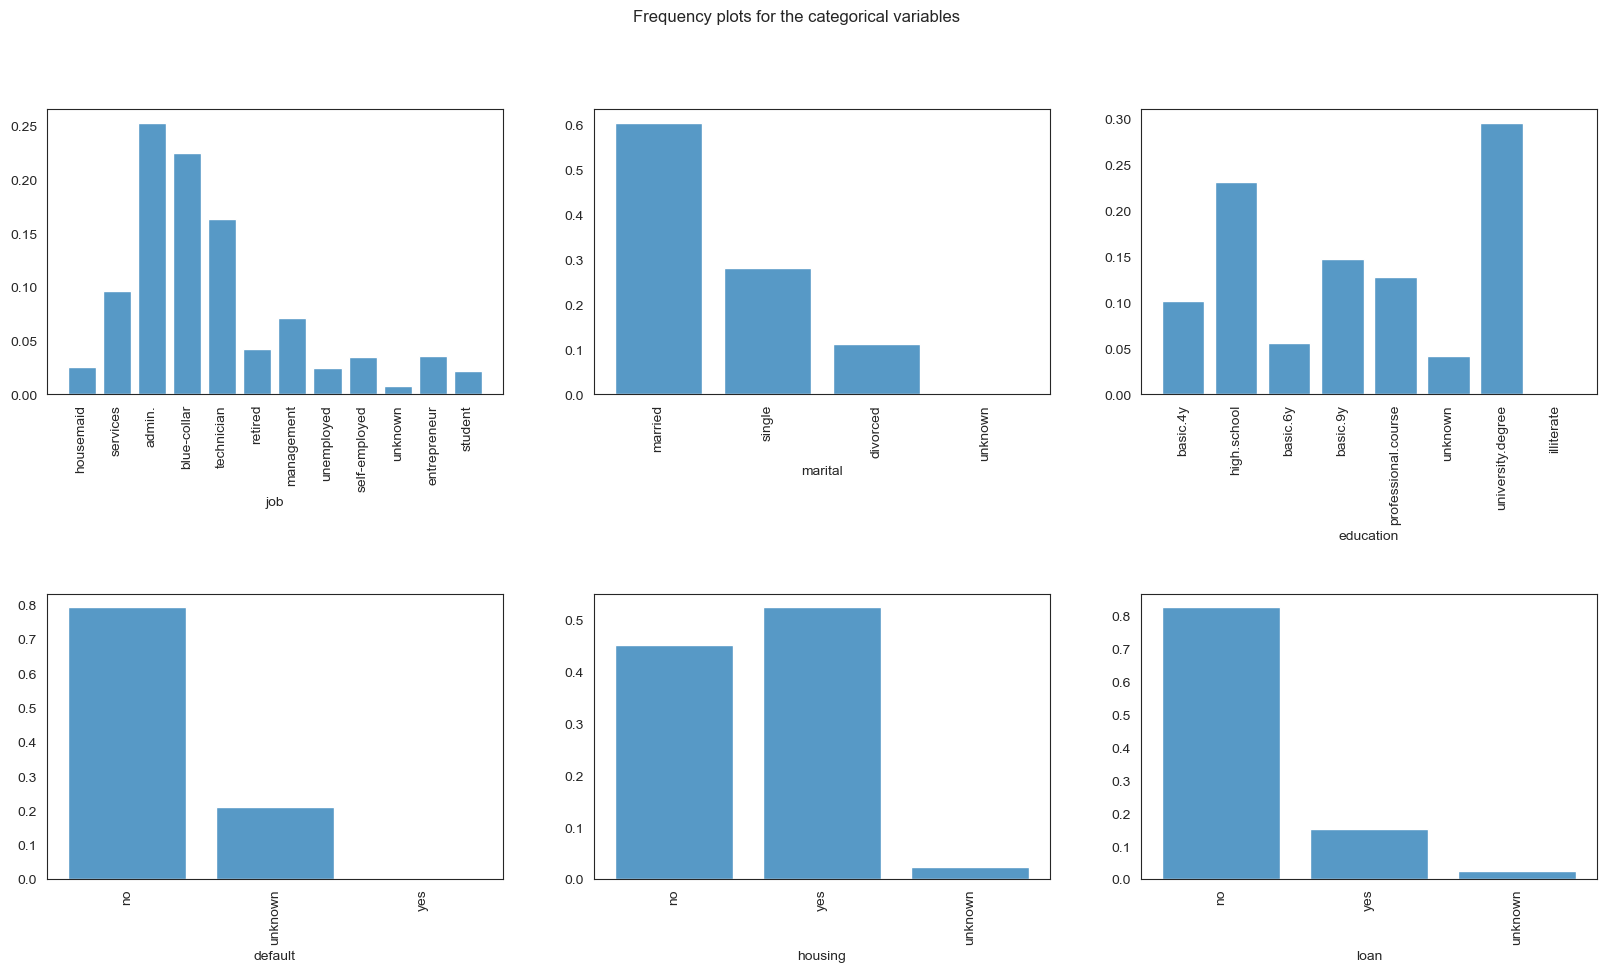

In [5]:
sns.set_style('white')

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = df['job'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,0])
axs[0,0].set_xticklabels(list(df['job'].unique()), rotation = 90)
sns.histplot(x = df['marital'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,1])
axs[0,1].set_xticklabels(list(df['marital'].unique()), rotation = 90)
sns.histplot(x = df['education'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,2])
axs[0,2].set_xticklabels(list(df['education'].unique()), rotation = 90)
sns.histplot(x = df['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,0])
axs[1,0].set_xticklabels(list(df['default'].unique()), rotation = 90)
sns.histplot(x = df['housing'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,1])
axs[1,1].set_xticklabels(list(df['housing'].unique()), rotation = 90)
sns.histplot(x = df['loan'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,2])
axs[1,2].set_xticklabels(list(df['loan'].unique()), rotation = 90)

plt.suptitle('Frequency plots for the categorical variables')

for ax in axs.ravel():
    ax.set_ylabel('')

plt.show();

#### We see that most of the bank's clients are admin, blue=collar and technicians. Most of the clients are married or single, have university degree or high-school education, have no credit in default or personal loans. The difference in the proportion of clients with and without housing loans is not too high. 

#### Visualizing the distribution of ages of the clients:

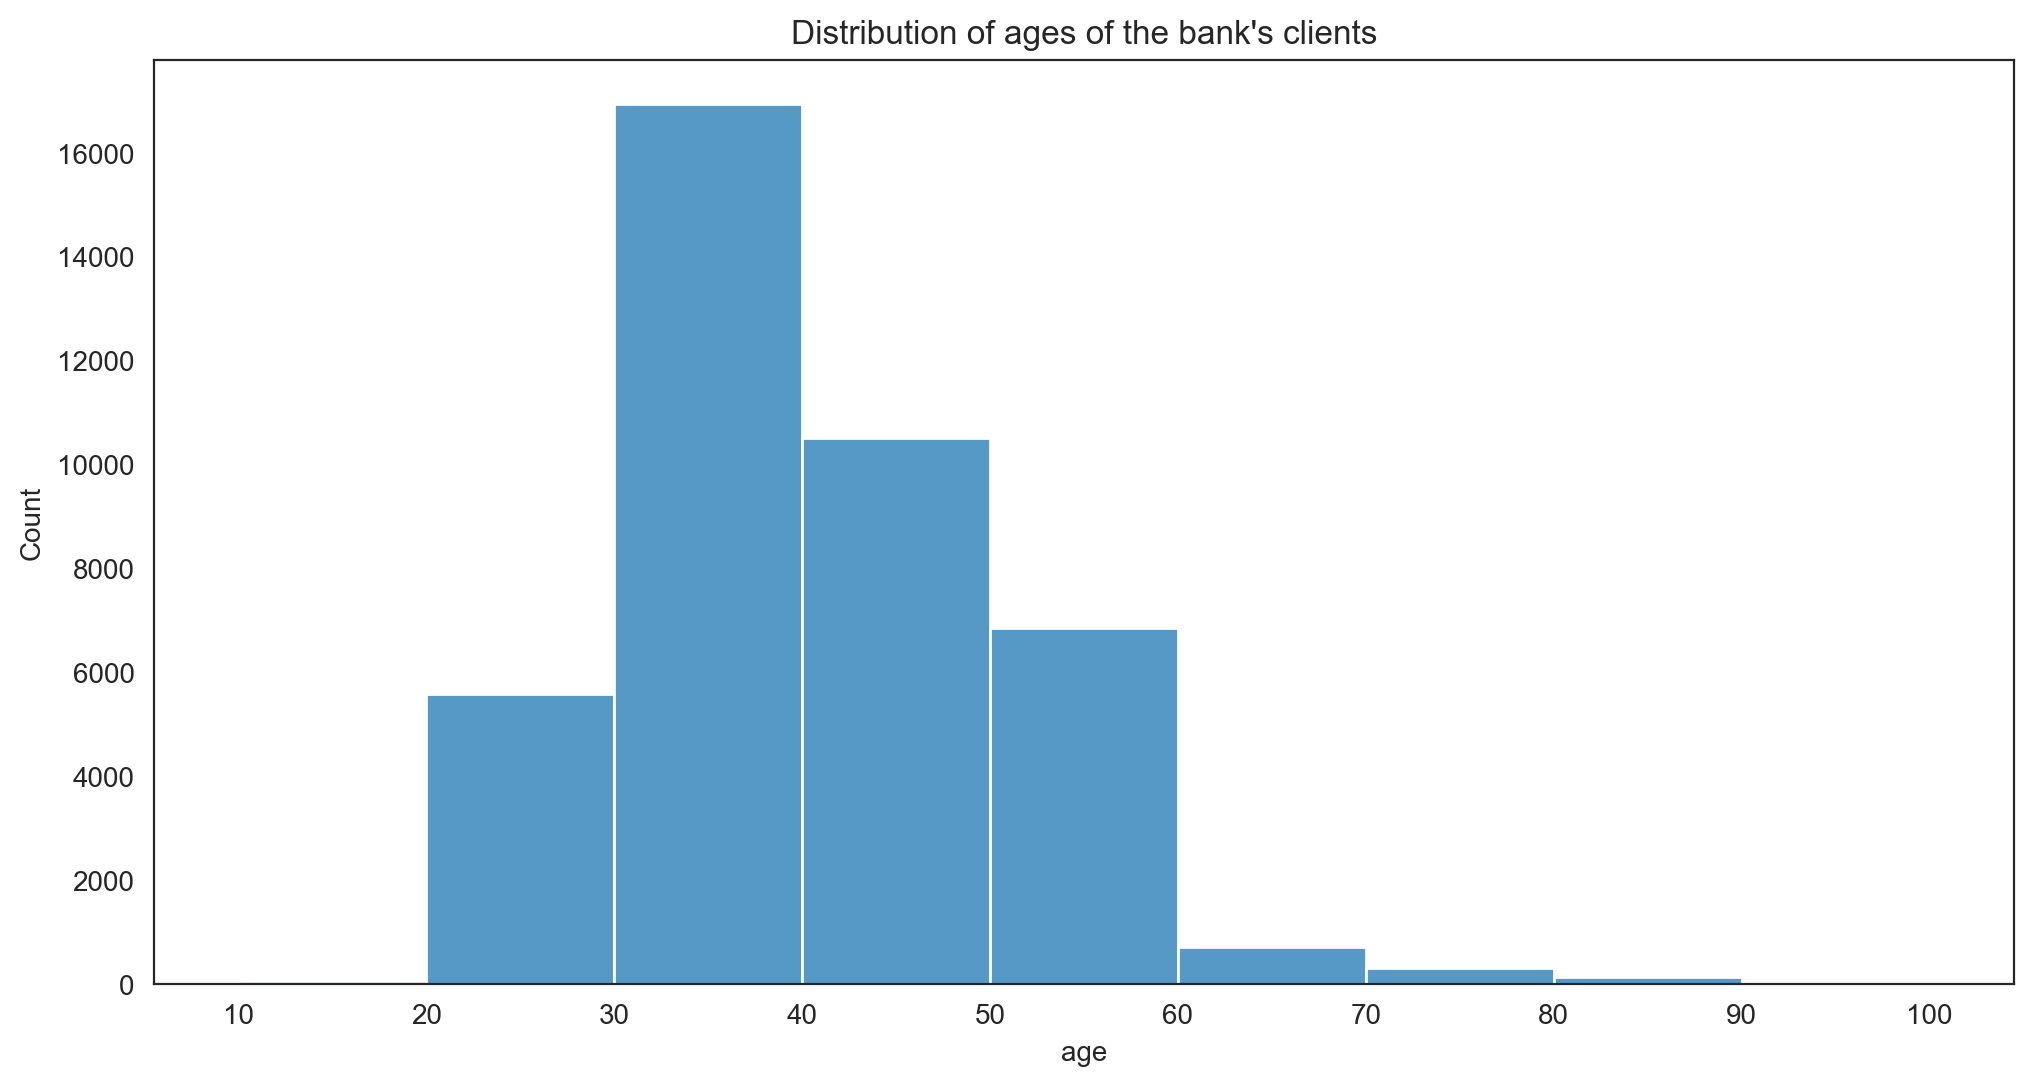

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='age', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90,100])
plt.title("Distribution of ages of the bank's clients")
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90,100])
plt.ylabel('Count')
plt.show()

#### Most of the bank's clients are between 30 to 40 years of age.

#### Among the clients, proportion of individuals who have taken personal loans  

<AxesSubplot:xlabel='age', ylabel='Count'>

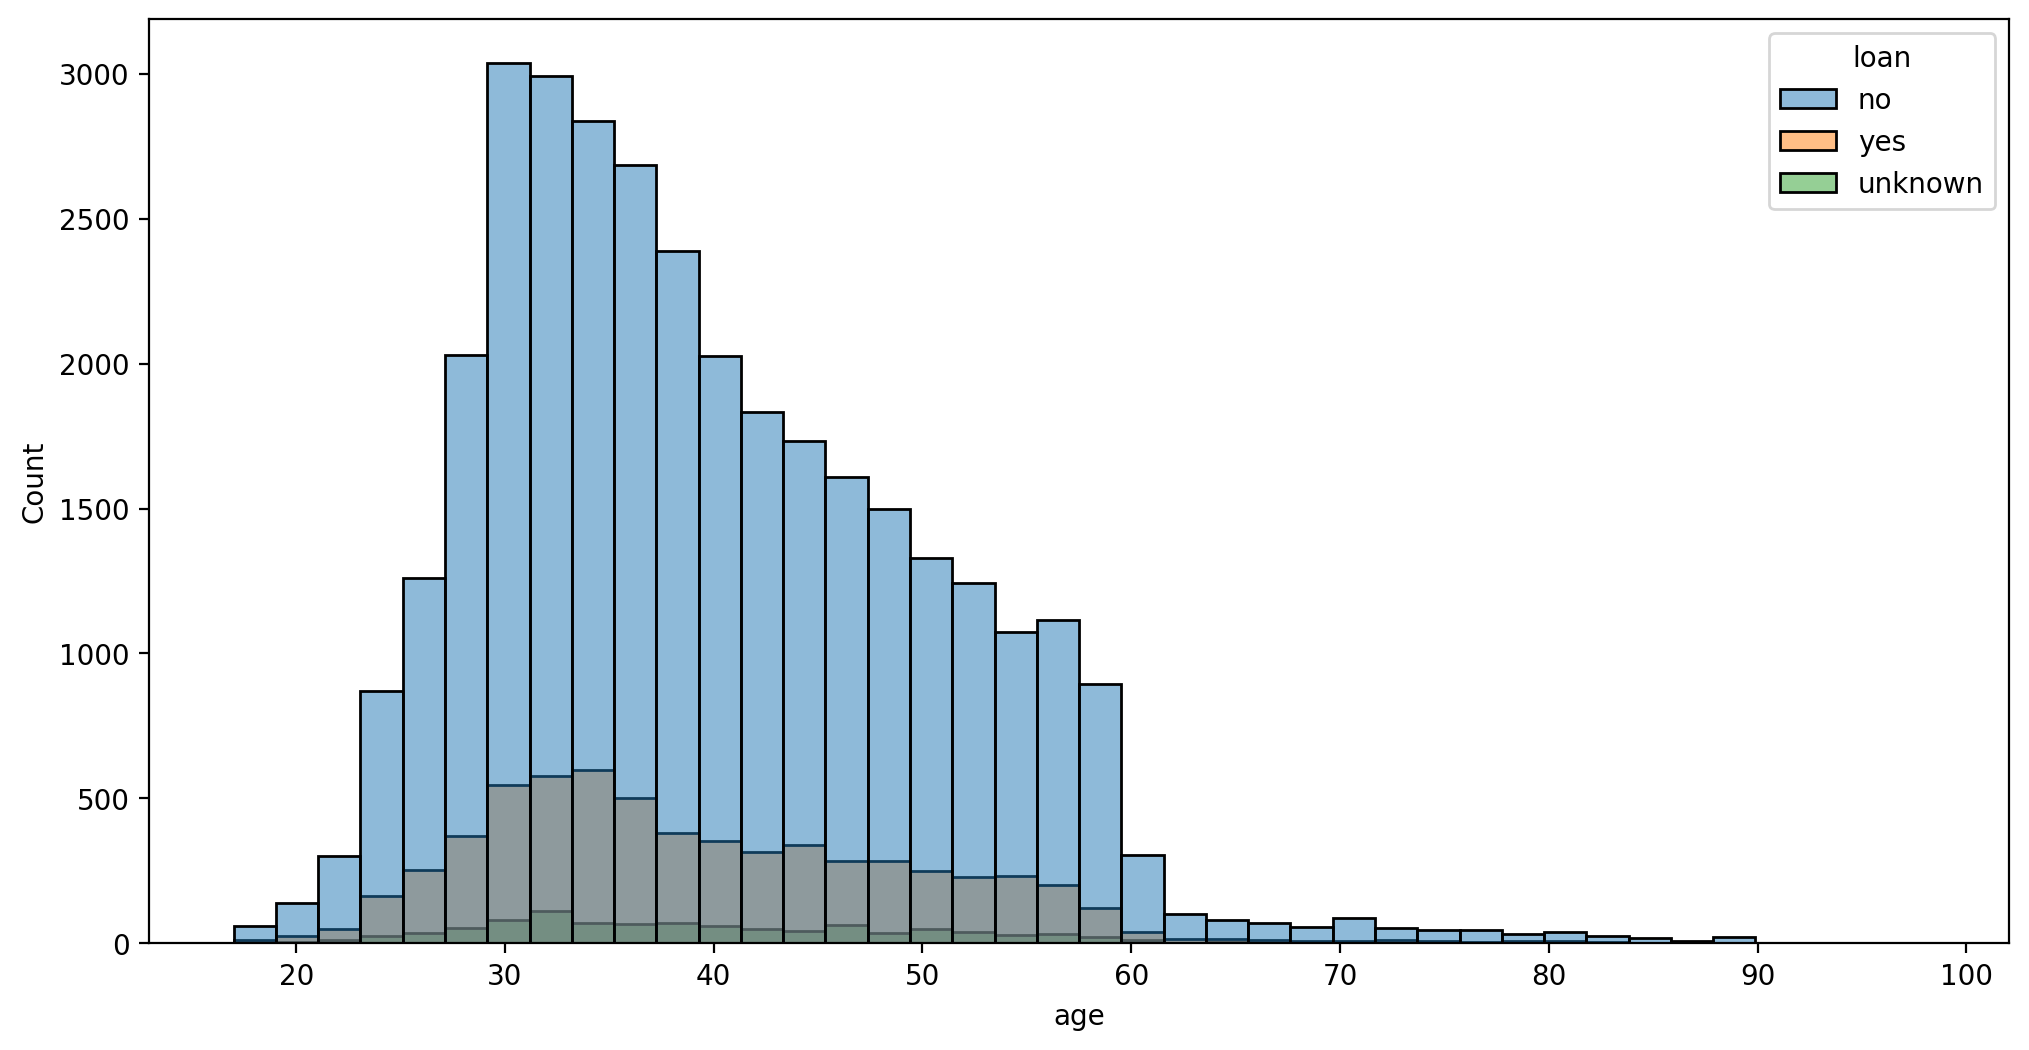

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=40,hue='loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

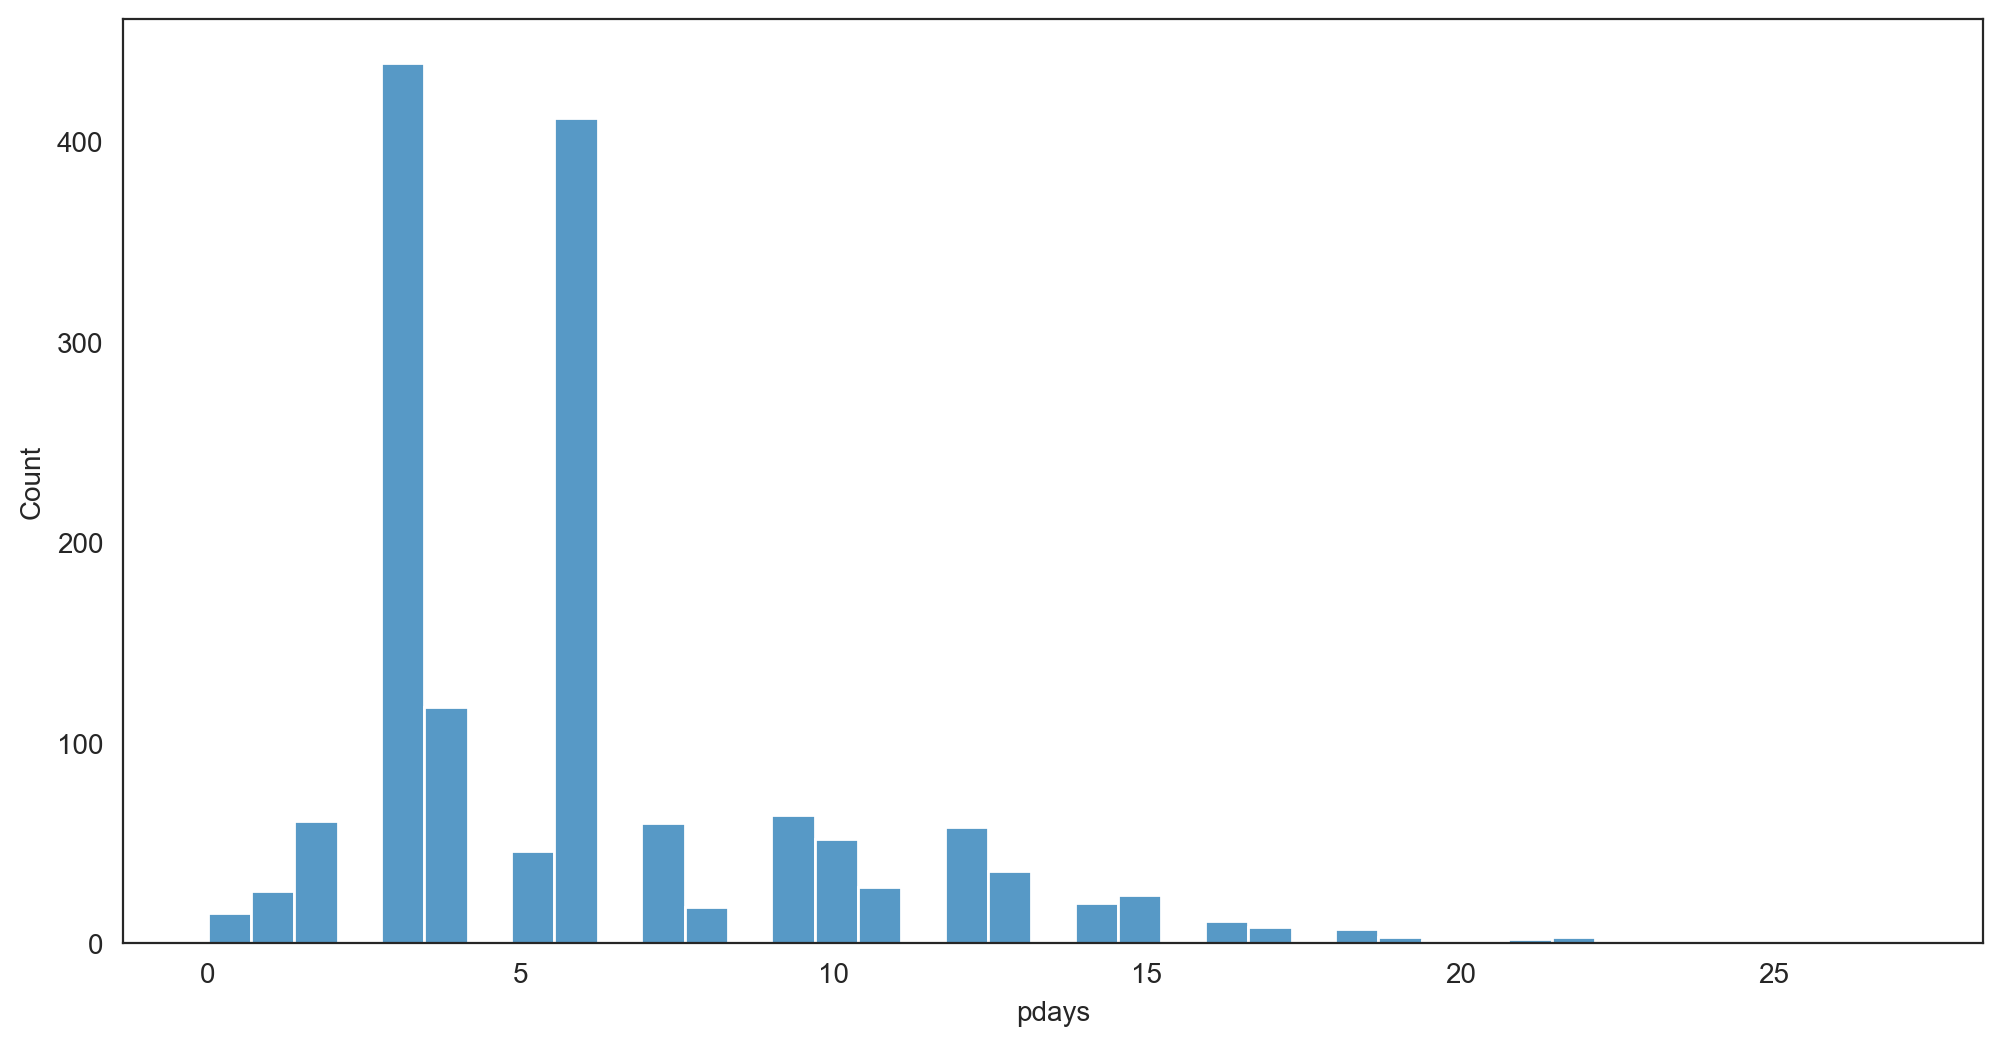

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

####  number of days that passed by after the client was last contacted from a previous campaign is mostly 3-6 days

#### When we had last contacted the customers, how long the call duration last -> Duration

#### Customers are generally contacted through the following ways: 

In [15]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [11]:
#How many seconds the last contact last
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

(0.0, 1000.0)

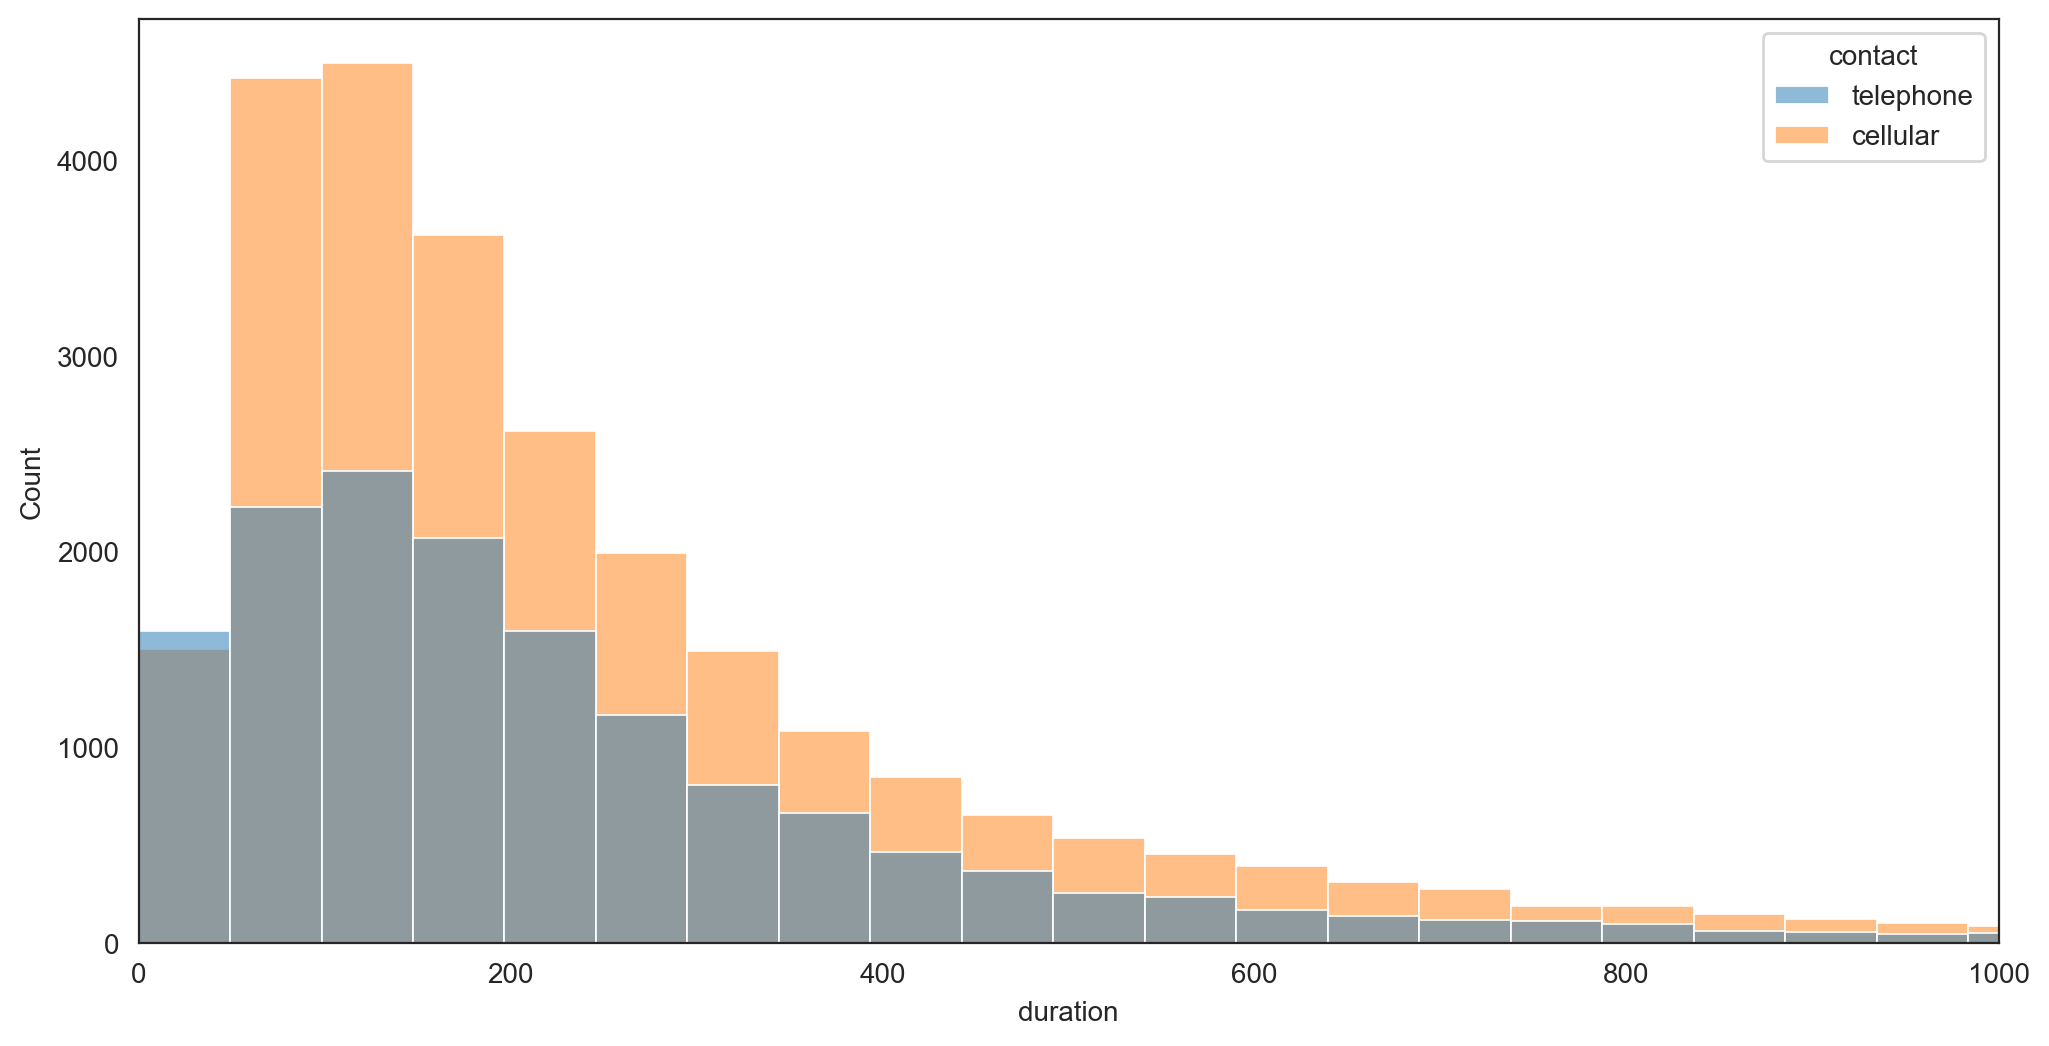

In [17]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact',bins=100)
plt.xlim(0,1000)

#### The above graph suggests clients are mostly contacted through cell-phones and the call duration lasted for mostly around 50-200 seconds. Since in today's time, mainly carry cell-phones, so count for cell-phones is higher. 

#### Contact through cell-phones vs telephones 

<AxesSubplot:xlabel='contact', ylabel='count'>

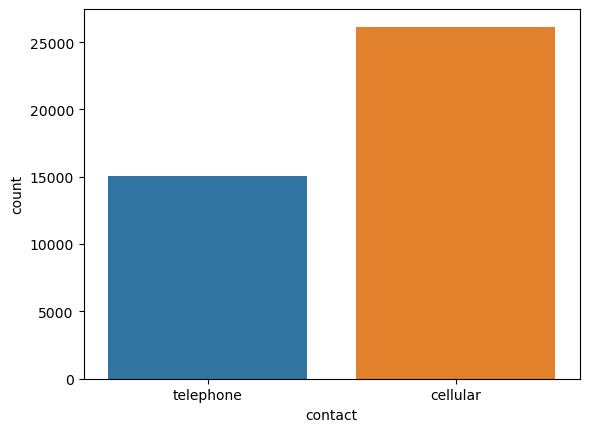

In [14]:
sns.countplot(data=df,x='contact')

#### Among the clients, distribution of the clients based on their education level who have credit in default.  

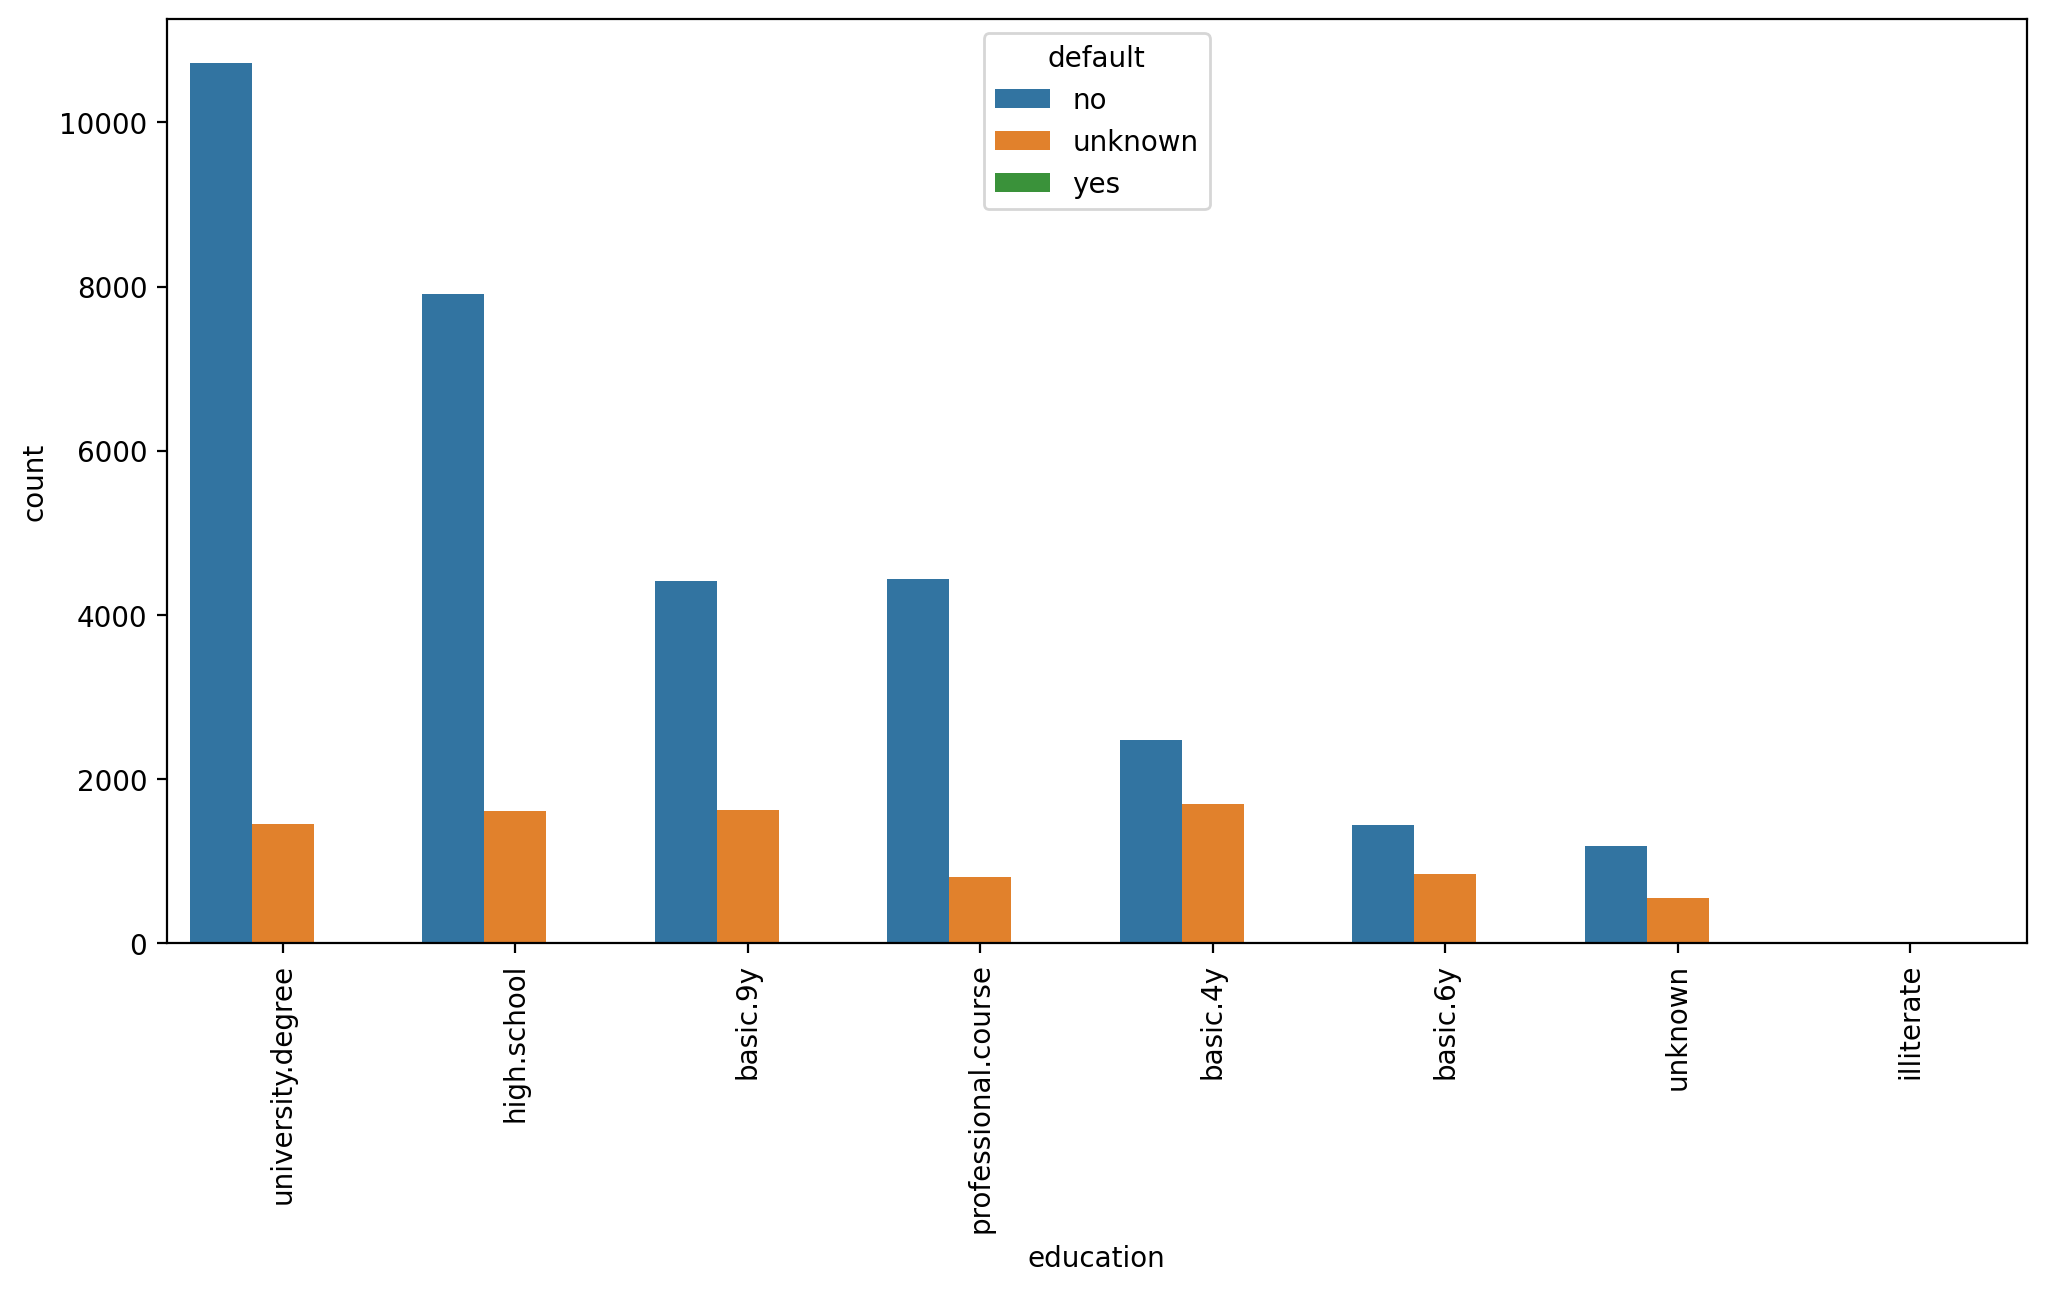

In [18]:
#Diff education types
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

In [20]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [21]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

#### since most people do not have a loan,so default is mostly no or unknown and yes is less


### Pairplot showing the pairwise relationship between the multiple numeric variables of the dataset

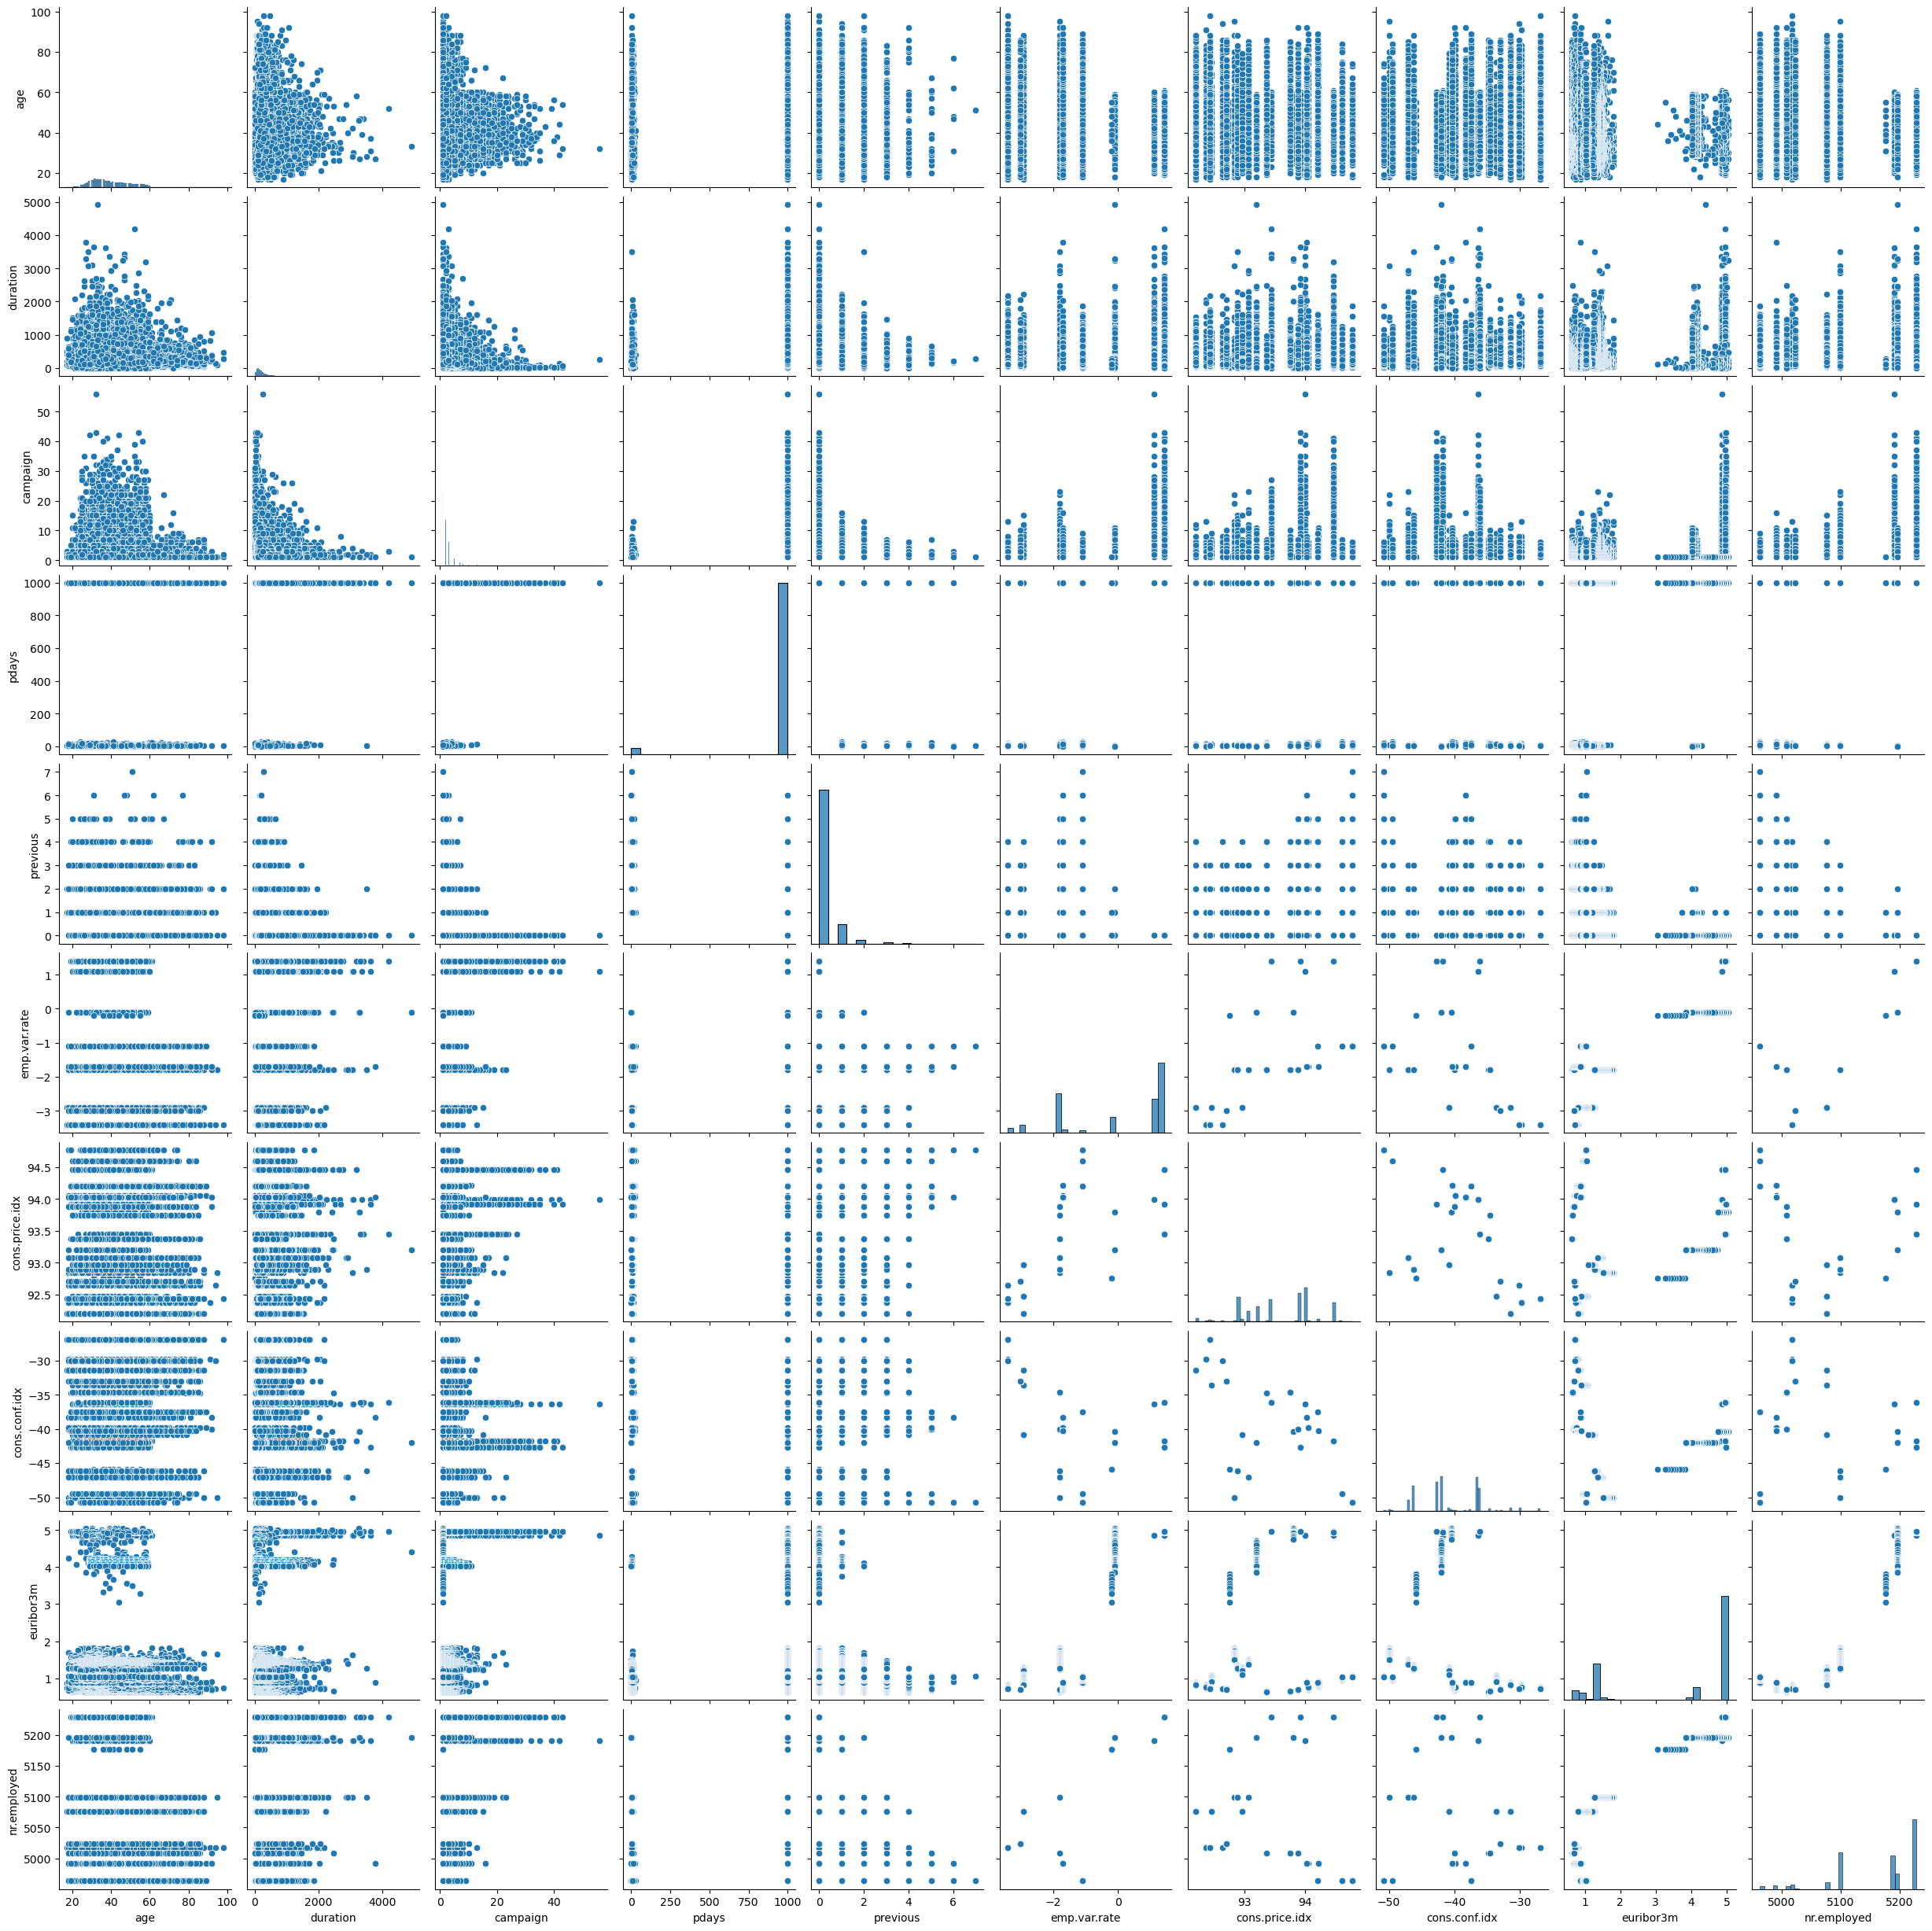

In [34]:
sns.pairplot(df)

### Correlation matrix to visualize the correlations between the numeric variables of the dataset 

Text(0.5, 1.0, 'Variable Correlation')

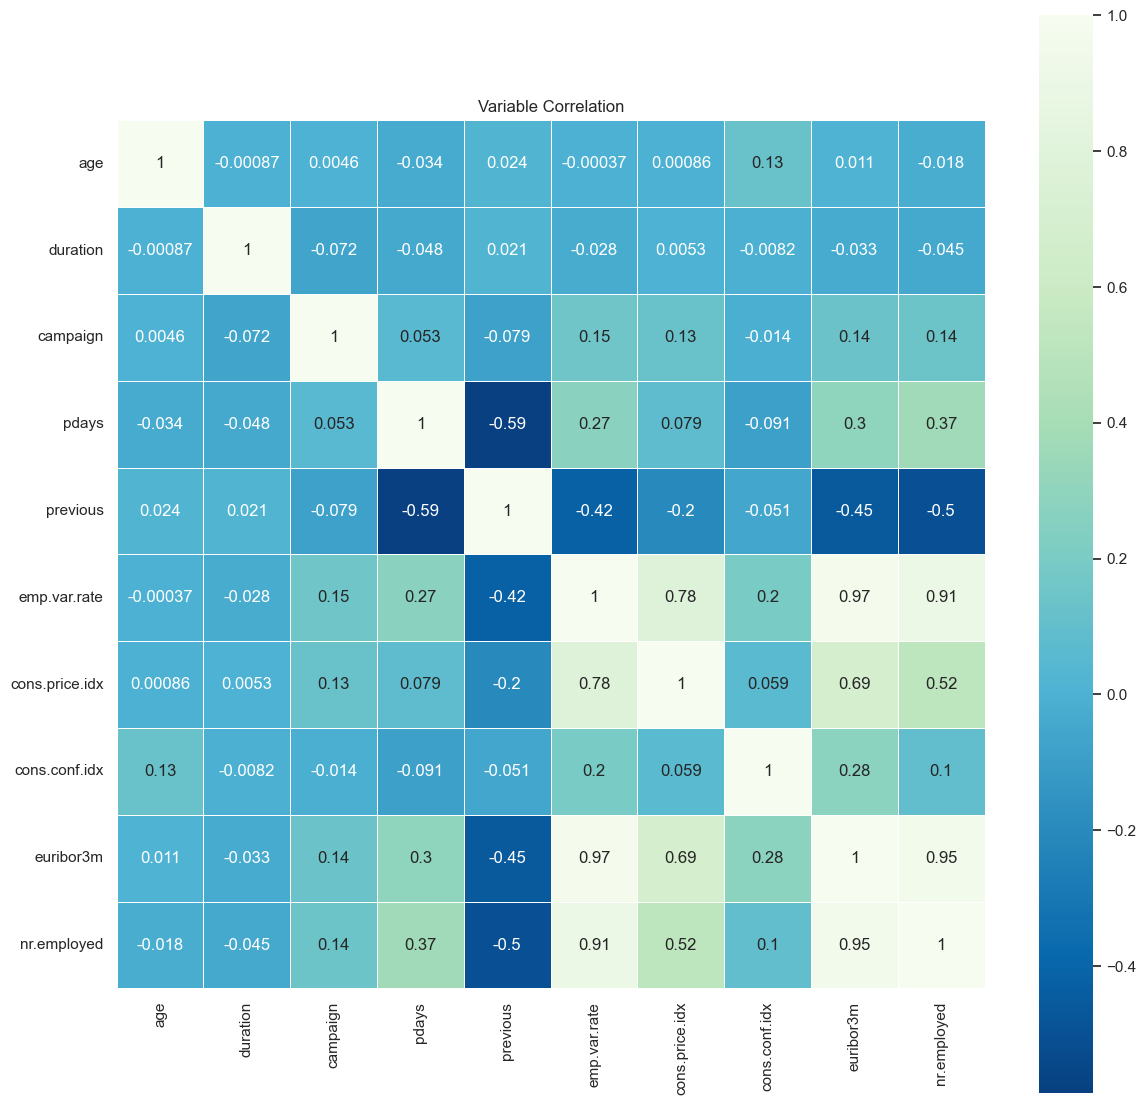

In [19]:
#Correlation Plot
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(df.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')

In [10]:
#To avoid mulicorinality drop the higly correltaed columns
df = df.drop(["emp.var.rate","nr.employed"],axis=1)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   cons.price.idx  cons.conf.idx  euribor3m subscribed  
0          93.994          -36.4      4.857         no  
1          93.994          -36.4      4.857         no  
2          93.994          -36.4      4.857         no  
3          93.994          -36.4      4.857         no  
4          93.994          -36.4      4.857         no

In [11]:
df.shape

(41188, 19)

Text(0.5, 1.0, 'Variable Correlation')

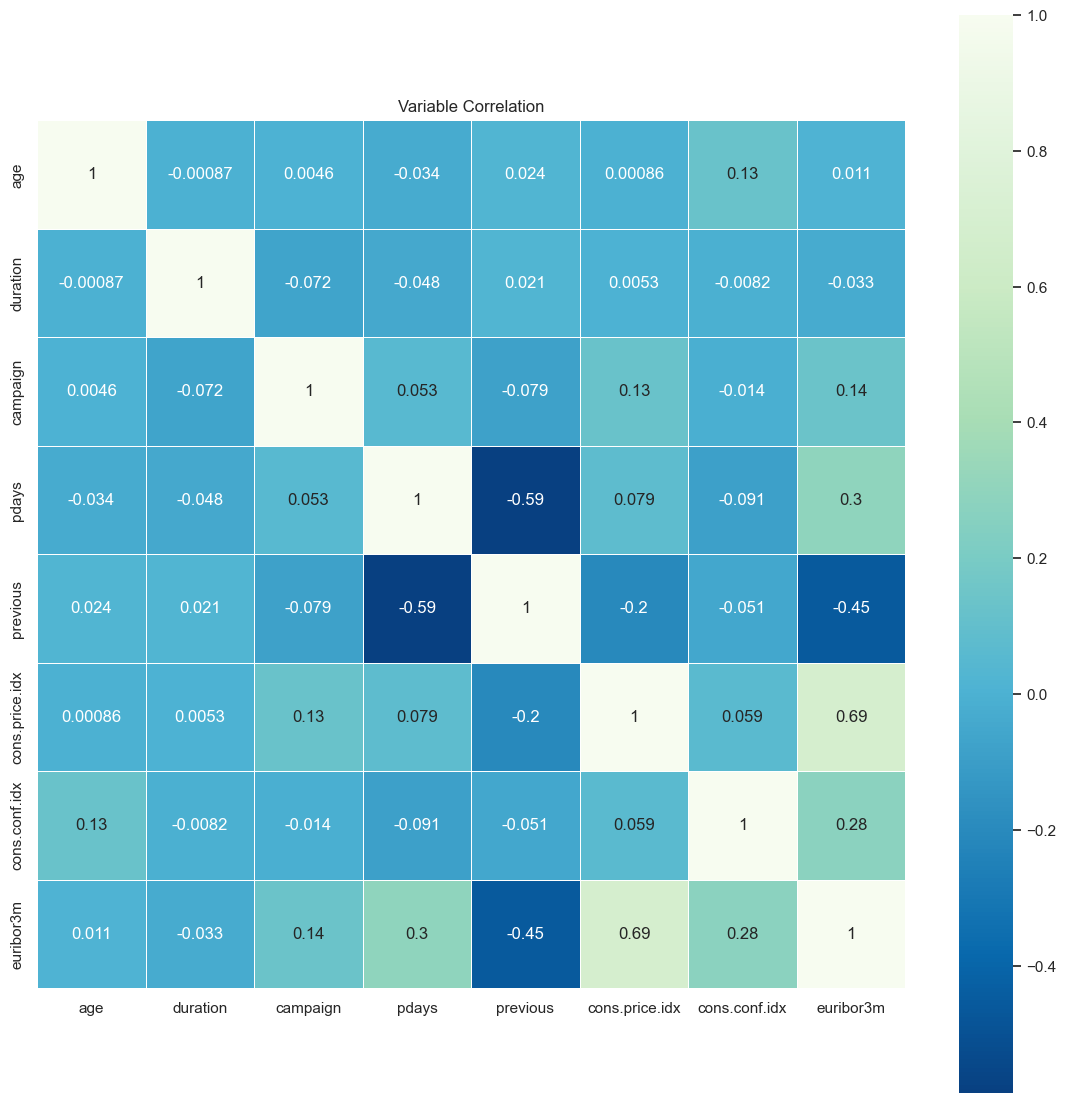

In [21]:
#Correlation Plot after removing the two columns.
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(df.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')

### Data preparation and K-means Clustering model fitting

#### For k-means clustering, we cannot use categorical data as everything is based on distance matrix, so we cannot measure the distance between categorical data,hence we need only numeric data

#### label encoding
 

In [12]:
jobDummies = pd.get_dummies(df['job'], prefix = 'job')
maritalDummies = pd.get_dummies(df['marital'], prefix = 'marital')
educationDummies = pd.get_dummies(df['education'], prefix = 'education')
defaultDummies = pd.get_dummies(df['default'], prefix = 'default')
housingDummies = pd.get_dummies(df['housing'], prefix = 'housing')
loanDummies = pd.get_dummies(df['loan'], prefix = 'loan')
contactDummies = pd.get_dummies(df['contact'], prefix = 'contact')
poutcomeDummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
df['month']=df['month'].astype('category')
df['day_of_week']=df['day_of_week'].astype('category')
df['subscribed']=df['subscribed'].astype('category')


# Assigning numerical values and storing in another column
df['month'] = df['month'].cat.codes
df['day_of_week'] = df['day_of_week'].cat.codes
df['subscribed'] = df['subscribed'].cat.codes

df['subscribed'].dtype

dtype('int8')

In [13]:

df["age"]=df["age"].astype("int")
df["duration"]=df["duration"].astype("int")
df["pdays"]=df["pdays"].astype("int")
df["previous"]=df["previous"].astype("int")
df["campaign"]=df["campaign"].astype("int")
df_int=df.select_dtypes(include=['int','float64','bool'])
#data_int
bank_df=pd.concat([df_int,jobDummies,maritalDummies,educationDummies,defaultDummies,housingDummies,loanDummies
                  ,contactDummies,poutcomeDummies,df['month'],df['day_of_week'],df['subscribed']],axis=1)
bank_df.head()

age  duration  campaign  pdays  previous  cons.price.idx  cons.conf.idx  \
0   56       261         1    999         0          93.994          -36.4   
1   57       149         1    999         0          93.994          -36.4   
2   37       226         1    999         0          93.994          -36.4   
3   40       151         1    999         0          93.994          -36.4   
4   56       307         1    999         0          93.994          -36.4   

   euribor3m  job_admin.  job_blue-collar  ...  loan_unknown  loan_yes  \
0      4.857           0                0  ...             0         0   
1      4.857           0                0  ...             0         0   
2      4.857           0                0  ...             0         0   
3      4.857           1                0  ...             0         0   
4      4.857           0                0  ...             0         1   

   contact_cellular  contact_telephone  poutcome_failure  \
0                 0                  1                 0   
1                 0                  1                 0   
2                 0                  1                 0   
3                 0                  1                 0   
4                 0                  1                 0   

   poutcome_nonexistent  poutcome_success  month  day_of_week  subscribed  
0                     1                 0      6            1           0  
1                     1                 0      6            1           0  
2                     1                 0      6            1           0  
3                     1                 0      6            1           0  
4                     1                 0      6            1           0  

[5 rows x 49 columns]

In [8]:
# Get the mapping of months to their corresponding codes
month_mapping = dict(zip(df['month'].cat.categories, range(len(df['month'].cat.categories))))

# Print the mapping
print(month_mapping)

{'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}


In [9]:
# Get the mapping of day of week to their corresponding codes
day_mapping = dict(zip(df['day_of_week'].cat.categories, range(len(df['day_of_week'].cat.categories))))

# Print the mapping
print(day_mapping)

{'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}


In [11]:
# Get the mapping of day of week to their corresponding codes
subscribed_mapping = dict(zip(df['subscribed'].cat.categories, range(len(df['subscribed'].cat.categories))))

# Print the mapping
print(subscribed_mapping)

{'no': 0, 'yes': 1}


In [14]:
bank_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'month', 'day_of_week',
       'subscribed'],
      dtype='object')

In [15]:
#Scale the data
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
scaled_x=scaler.fit_transform(bank_df)

In [18]:
scaled_x.shape

(41188, 49)

#### Methodology to select k-value

In [20]:
from sklearn.cluster import KMeans

In [ ]:
#just like MSE or RMSE the process of k is to be considered -->We do this by elbow method

In [22]:
ssd=[]
for k in range(2,10):
    model=KMeans(n_clusters=k)
    model.fit(scaled_x)
    ssd.append(model.inertia_)#Sum of square distances from cluster centre

In [23]:
ssd

[1873315.7112495084,
 1787429.9819856475,
 1695999.104408227,
 1631963.2383761483,
 1592785.6196781923,
 1558166.2041208504,
 1482820.2730918848,
 1462270.2984785049]

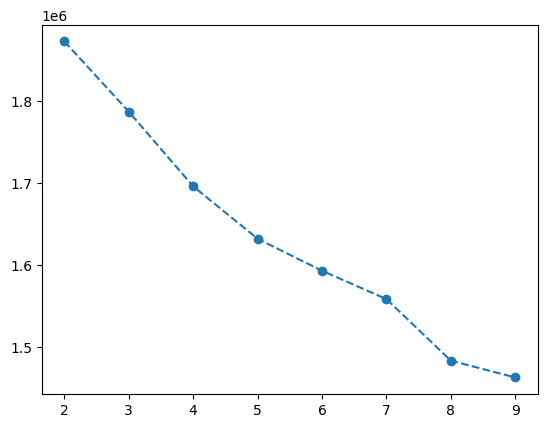

In [24]:
plt.plot(range(2,10),ssd,'o--')

In [30]:
pd.Series(ssd)

0    1.873316e+06
1    1.787430e+06
2    1.695999e+06
3    1.631963e+06
4    1.592786e+06
5    1.558166e+06
6    1.482820e+06
7    1.462270e+06
dtype: float64

In [31]:
pd.Series(ssd).diff()

0             NaN
1   -85885.729264
2   -91430.877577
3   -64035.866032
4   -39177.618698
5   -34619.415557
6   -75345.931029
7   -20549.974613
dtype: float64

In [ ]:
#Thus k=6 clusters is approprite

In [21]:
model6= KMeans(n_clusters=6,random_state=42)

In [22]:
cluster_labels6=model6.fit_predict(scaled_x)

In [23]:
cluster_labels6

array([0, 2, 1, ..., 4, 4, 5])

In [59]:
s = silhouette_score(scaled_x, cluster_labels6)
print('Silhouette Score:', s)

Silhouette Score: 0.07912548808620921


In [24]:
bank_df['Cluster6'] = cluster_labels6

In [25]:
bank_df

age  duration  campaign  pdays  previous  cons.price.idx  \
0       56       261         1    999         0          93.994   
1       57       149         1    999         0          93.994   
2       37       226         1    999         0          93.994   
3       40       151         1    999         0          93.994   
4       56       307         1    999         0          93.994   
...    ...       ...       ...    ...       ...             ...   
41183   73       334         1    999         0          94.767   
41184   46       383         1    999         0          94.767   
41185   56       189         2    999         0          94.767   
41186   44       442         1    999         0          94.767   
41187   74       239         3    999         1          94.767   

       cons.conf.idx  euribor3m  job_admin.  job_blue-collar  ...  loan_yes  \
0              -36.4      4.857           0                0  ...         0   
1              -36.4      4.857           0                0  ...         0   
2              -36.4      4.857           0                0  ...         0   
3              -36.4      4.857           1                0  ...         0   
4              -36.4      4.857           0                0  ...         1   
...              ...        ...         ...              ...  ...       ...   
41183          -50.8      1.028           0                0  ...         0   
41184          -50.8      1.028           0                1  ...         0   
41185          -50.8      1.028           0                0  ...         0   
41186          -50.8      1.028           0                0  ...         0   
41187          -50.8      1.028           0                0  ...         0   

       contact_cellular  contact_telephone  poutcome_failure  \
0                     0                  1                 0   
1                     0                  1                 0   
2                     0                  1                 0   
3                     0                  1                 0   
4                     0                  1                 0   
...                 ...                ...               ...   
41183                 1                  0                 0   
41184                 1                  0                 0   
41185                 1                  0                 0   
41186                 1                  0                 0   
41187                 1                  0                 1   

       poutcome_nonexistent  poutcome_success  month  day_of_week  subscribed  \
0                         1                 0      6            1           0   
1                         1                 0      6            1           0   
2                         1                 0      6            1           0   
3                         1                 0      6            1           0   
4                         1                 0      6            1           0   
...                     ...               ...    ...          ...         ...   
41183                     1                 0      7            0           1   
41184                     1                 0      7            0           0   
41185                     1                 0      7            0           0   
41186                     1                 0      7            0           1   
41187                     0                 0      7            0           0   

       Cluster6  
0             0  
1             2  
2             1  
3             1  
4             1  
...         ...  
41183         4  
41184         4  
41185         4  
41186         4  
41187         5  

[41188 rows x 50 columns]

In [38]:
#How correlates are the other freatures against the clusters, so we find out Pearson's correlation coefficient.
bank_df.corr()

age  duration  campaign     pdays  \
age                            1.000000 -0.000866  0.004594 -0.034369   
duration                      -0.000866  1.000000 -0.071699 -0.047577   
campaign                       0.004594 -0.071699  1.000000  0.052584   
pdays                         -0.034369 -0.047577  0.052584  1.000000   
previous                       0.024365  0.020640 -0.079141 -0.587514   
cons.price.idx                 0.000857  0.005312  0.127836  0.078889   
cons.conf.idx                  0.129372 -0.008173 -0.013733 -0.091342   
euribor3m                      0.010767 -0.032897  0.135133  0.296899   
job_admin.                    -0.102584 -0.008918  0.011745 -0.025398   
job_blue-collar               -0.024191  0.012992 -0.001775  0.065335   
job_entrepreneur               0.031213  0.003679 -0.002203  0.019246   
job_housemaid                  0.085403 -0.004908  0.004226 -0.001649   
job_management                 0.062040 -0.001308 -0.009135  0.000254   
job_retired                    0.440772  0.012421 -0.006847 -0.072084   
job_self-employed             -0.001356  0.004270  0.006361  0.014307   
job_services                  -0.065731  0.000142  0.002383  0.030573   
job_student                   -0.199749  0.014432 -0.024657 -0.096367   
job_technician                -0.064383 -0.013742  0.001557  0.004575   
job_unemployed                -0.004426 -0.005413 -0.000200 -0.023085   
job_unknown                    0.047773 -0.006450  0.002625 -0.011419   
marital_divorced               0.166125 -0.006156  0.005872  0.011711   
marital_married                0.271266 -0.004042  0.002332  0.031614   
marital_single                -0.411703  0.007808 -0.007624 -0.042015   
marital_unknown                0.001062  0.009263  0.009873 -0.005989   
education_basic.4y             0.244079  0.008476  0.004000  0.005804   
education_basic.6y             0.009897  0.005739 -0.000991  0.023238   
education_basic.9y            -0.038320  0.004810 -0.005278  0.036963   
education_high.school         -0.106550  0.005500  0.000195  0.005522   
education_illiterate           0.017007  0.001491 -0.002188 -0.002086   
education_professional.course  0.002054 -0.008472  0.002554 -0.003493   
education_university.degree   -0.071138 -0.012641 -0.000950 -0.036958   
education_unknown              0.069485  0.003317  0.002162 -0.022014   
default_no                    -0.165019  0.011694 -0.032923 -0.080072   
default_unknown                0.165001 -0.011588  0.033007  0.080047   
default_yes                    0.001891 -0.005101 -0.003803  0.001668   
housing_no                     0.001755  0.008334  0.010959  0.010131   
housing_unknown               -0.001092 -0.004897 -0.000396  0.002033   
housing_yes                   -0.001414 -0.006804 -0.010800 -0.010719   
loan_no                        0.007224  0.001856 -0.004831 -0.000737   
loan_unknown                  -0.001092 -0.004897 -0.000396  0.002033   
loan_yes                      -0.007198  0.000121  0.005294 -0.000086   
contact_cellular              -0.007021  0.026657 -0.077368 -0.117970   
contact_telephone              0.007021 -0.026657  0.077368  0.117970   
poutcome_failure              -0.002537 -0.013311 -0.068890  0.006354   
poutcome_nonexistent          -0.016376 -0.011665  0.087645  0.491353   
poutcome_success               0.035626  0.044876 -0.050893 -0.950700   
month                         -0.024877  0.003690 -0.062059 -0.047891   
day_of_week                   -0.017572  0.021950 -0.038288 -0.009531   
subscribed                     0.030399  0.405274 -0.066357 -0.324914   
Cluster6                      -0.055374  0.027845 -0.091293 -0.250075   

                               previous  cons.price.idx  cons.conf.idx  \
age                            0.024365        0.000857       0.129372   
duration                       0.020640        0.005312      -0.008173   
campaign                      -0.079141        0.127836      -0.013733   
pdays           

##### Which features are actually important in the decision of the clusters 

In [39]:
plt.figure(figsize=(12,6),dpi=200)
bank_df.corr()['Cluster6'].iloc[:-1].sort_values()

contact_telephone               -0.759707
cons.price.idx                  -0.559517
poutcome_nonexistent            -0.508629
euribor3m                       -0.506234
job_housemaid                   -0.301429
default_unknown                 -0.265660
pdays                           -0.250075
cons.conf.idx                   -0.225439
month                           -0.136755
education_basic.4y              -0.116814
marital_married                 -0.103573
campaign                        -0.091293
job_blue-collar                 -0.082473
housing_no                      -0.073923
age                             -0.055374
education_basic.6y              -0.054363
education_basic.9y              -0.049581
job_services                    -0.022226
job_unknown                     -0.016532
education_unknown               -0.015282
job_entrepreneur                -0.010855
loan_no                         -0.010559
marital_divorced                -0.010272
day_of_week                      0

<Figure size 2400x1200 with 0 Axes>

<AxesSubplot:>

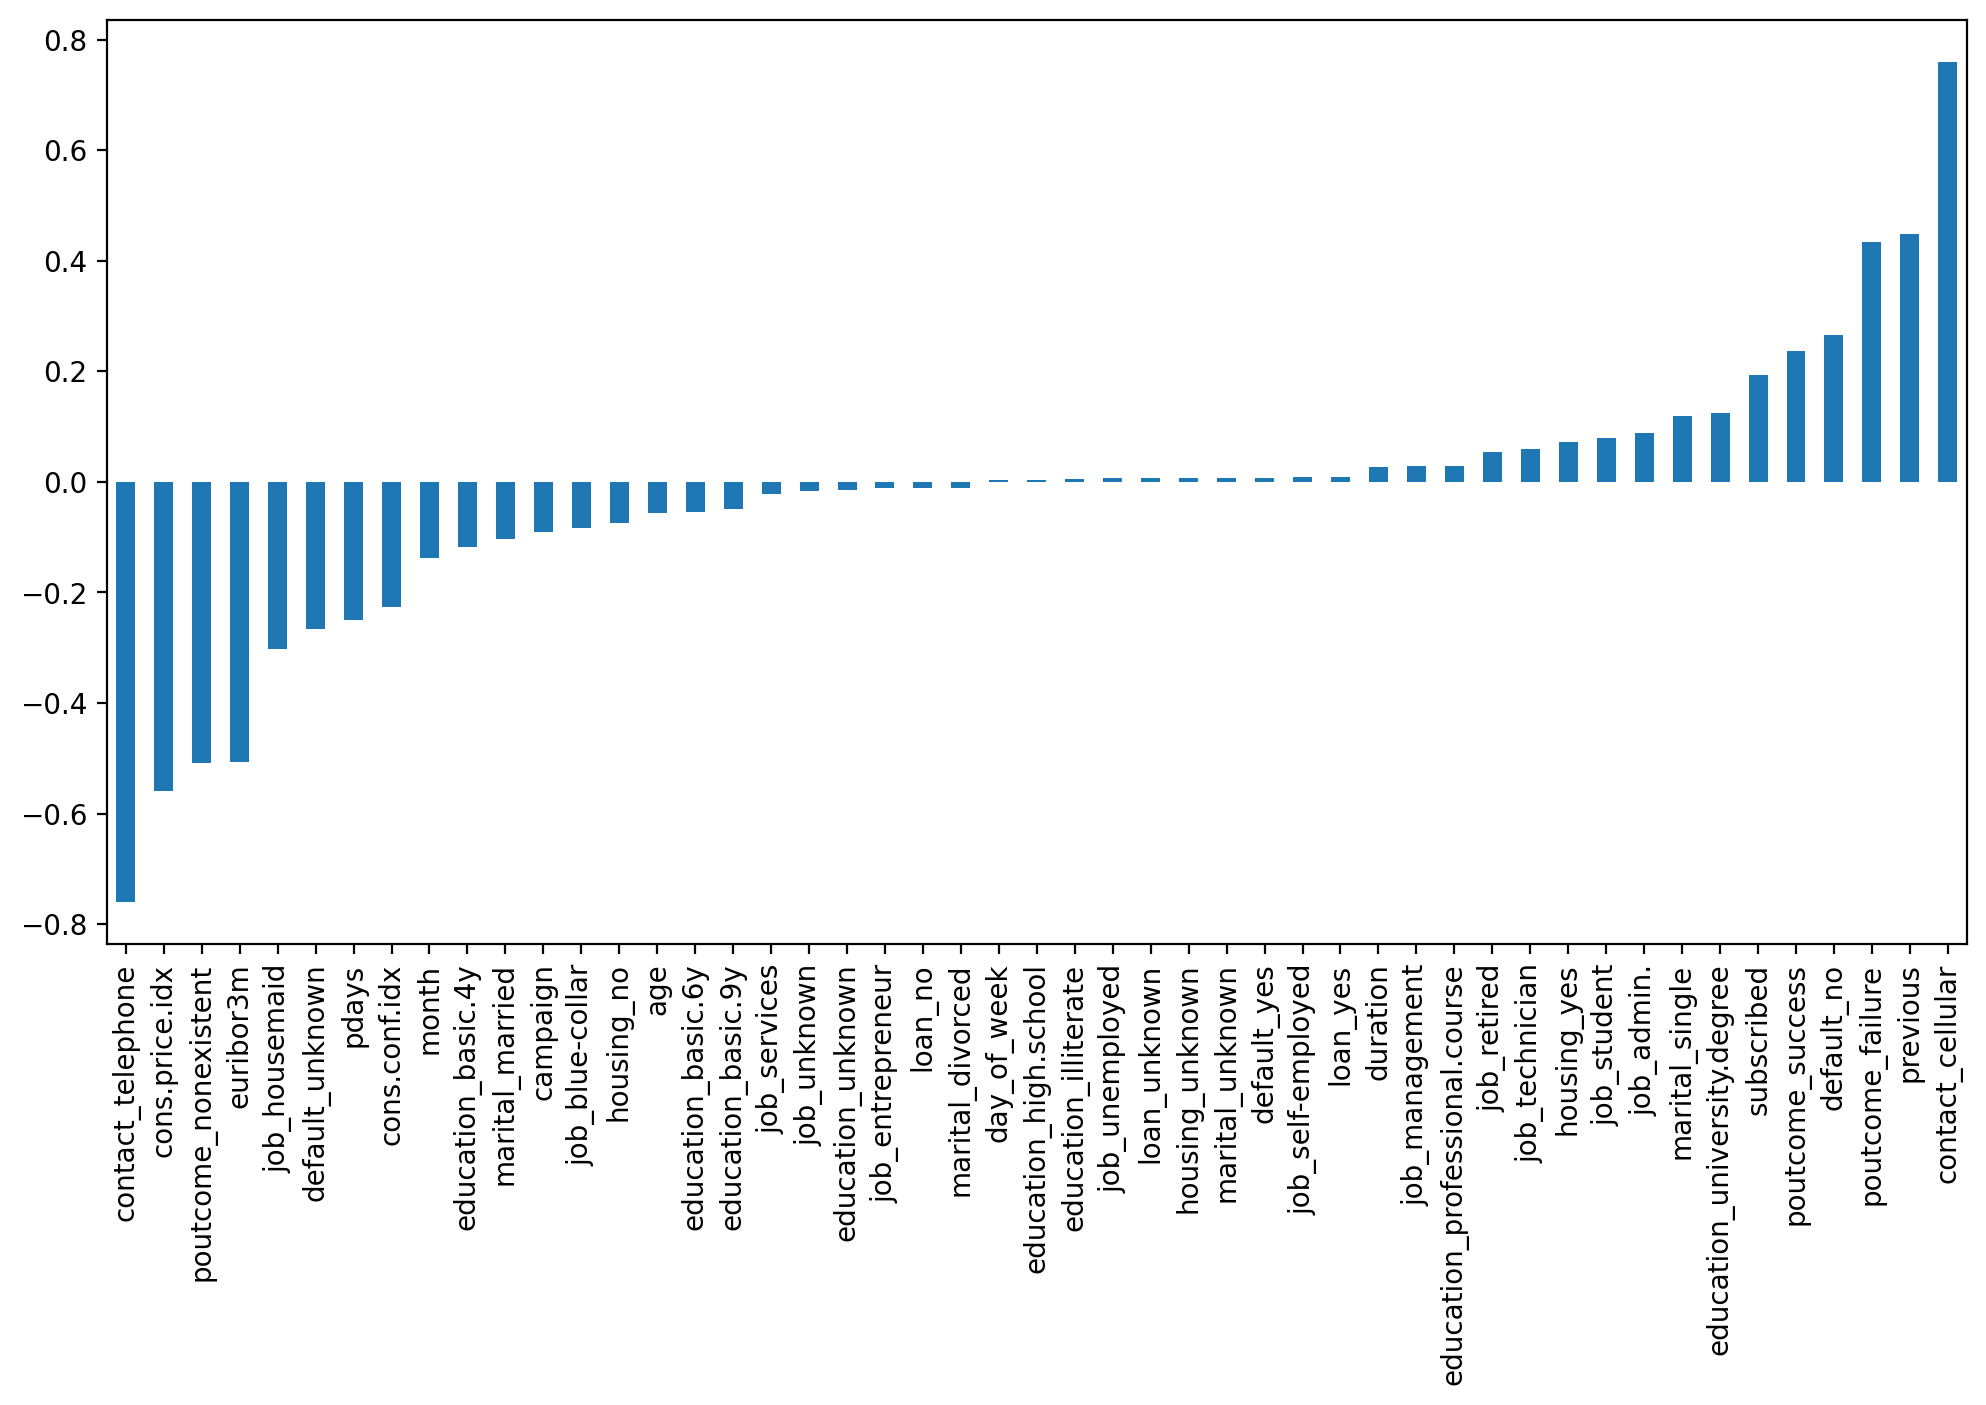

In [40]:
#How correlated is every feature to the clusters -->Shows which features are mainly considered while creating the clusters based on KMeans
plt.figure(figsize=(12,6),dpi=200)
bank_df.corr()['Cluster6'].iloc[:-1].sort_values().plot(kind='bar')

In [26]:
df['Clusterk6']=bank_df['Cluster6']

In [27]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact  month  day_of_week  duration  campaign  pdays  previous  \
0      telephone      6            1       261         1    999         0   
1      telephone      6            1       149         1    999         0   
2      telephone      6            1       226         1    999         0   
3      telephone      6            1       151         1    999         0   
4      telephone      6            1       307         1    999         0   
...          ...    ...          ...       ...       ...    ...       ...   
41183   cellular      7            0       334         1    999         0   
41184   cellular      7            0       383         1    999         0   
41185   cellular      7            0       189         2    999         0   
41186   cellular      7            0       442         1    999         0   
41187   cellular      7            0       239         3    999         1   

          poutcome  cons.price.idx  cons.conf.idx  euribor3m  subscribed  \
0      nonexistent          93.994          -36.4      4.857           0   
1      nonexistent          93.994          -36.4      4.857           0   
2      nonexistent          93.994          -36.4      4.857           0   
3      nonexistent          93.994          -36.4      4.857           0   
4      nonexistent          93.994          -36.4      4.857           0   
...            ...             ...            ...        ...         ...   
41183  nonexistent          94.767          -50.8      1.028           1   
41184  nonexistent          94.767          -50.8      1.028           0   
41185  nonexistent          94.767          -50.8      1.028           0   
41186  nonexistent          94.767          -50.8      1.028           1   
41187      failure          94.767          -50.8      1.028           0   

       Clusterk6  
0              0  
1              2  
2              1  
3              1  
4              1  
...          ...  
41183          4  
41184          4  
41185          4  
41186          4  
41187          5  

[41188 rows x 20 columns]

In [43]:
df.corr()

age     month  day_of_week  duration  campaign     pdays  \
age             1.000000 -0.024877    -0.017572 -0.000866  0.004594 -0.034369   
month          -0.024877  1.000000     0.027677  0.003690 -0.062059 -0.047891   
day_of_week    -0.017572  0.027677     1.000000  0.021950 -0.038288 -0.009531   
duration       -0.000866  0.003690     0.021950  1.000000 -0.071699 -0.047577   
campaign        0.004594 -0.062059    -0.038288 -0.071699  1.000000  0.052584   
pdays          -0.034369 -0.047891    -0.009531 -0.047577  0.052584  1.000000   
previous        0.024365  0.103157    -0.004102  0.020640 -0.079141 -0.587514   
cons.price.idx  0.000857 -0.004239     0.005644  0.005312  0.127836  0.078889   
cons.conf.idx   0.129372  0.009652     0.041465 -0.008173 -0.013733 -0.091342   
euribor3m       0.010767 -0.117264     0.039043 -0.032897  0.135133  0.296899   
subscribed      0.030399 -0.006065     0.015967  0.405274 -0.066357 -0.324914   
Clusterk6      -0.055374 -0.136755     0.003711  0.027845 -0.091293 -0.250075   

                previous  cons.price.idx  cons.conf.idx  euribor3m  \
age             0.024365        0.000857       0.129372   0.010767   
month           0.103157       -0.004239       0.009652  -0.117264   
day_of_week    -0.004102        0.005644       0.041465   0.039043   
duration        0.020640        0.005312      -0.008173  -0.032897   
campaign       -0.079141        0.127836      -0.013733   0.135133   
pdays          -0.587514        0.078889      -0.091342   0.296899   
previous        1.000000       -0.203130      -0.050936  -0.454494   
cons.price.idx -0.203130        1.000000       0.058986   0.688230   
cons.conf.idx  -0.050936        0.058986       1.000000   0.277686   
euribor3m      -0.454494        0.688230       0.277686   1.000000   
subscribed      0.230181       -0.136211       0.054878  -0.307771   
Clusterk6       0.448104       -0.559517      -0.225439  -0.506234   

                subscribed  Clusterk6  
age               0.030399  -0.055374  
month            -0.006065  -0.136755  
day_of_week       0.015967   0.003711  
duration          0.405274   0.027845  
campaign         -0.066357  -0.091293  
pdays            -0.324914  -0.250075  
previous          0.230181   0.448104  
cons.price.idx   -0.136211  -0.559517  
cons.conf.idx     0.054878  -0.225439  
euribor3m        -0.307771  -0.506234  
subscribed        1.000000   0.193148  
Clusterk6         0.193148   1.000000

In [44]:
df.corr()['Clusterk6']

age              -0.055374
month            -0.136755
day_of_week       0.003711
duration          0.027845
campaign         -0.091293
pdays            -0.250075
previous          0.448104
cons.price.idx   -0.559517
cons.conf.idx    -0.225439
euribor3m        -0.506234
subscribed        0.193148
Clusterk6         1.000000
Name: Clusterk6, dtype: float64

In [45]:
plt.figure(figsize=(12,6),dpi=200)
df.corr()['Clusterk6'].iloc[:-1].sort_values()

cons.price.idx   -0.559517
euribor3m        -0.506234
pdays            -0.250075
cons.conf.idx    -0.225439
month            -0.136755
campaign         -0.091293
age              -0.055374
day_of_week       0.003711
duration          0.027845
subscribed        0.193148
previous          0.448104
Name: Clusterk6, dtype: float64

<Figure size 2400x1200 with 0 Axes>

<AxesSubplot:>

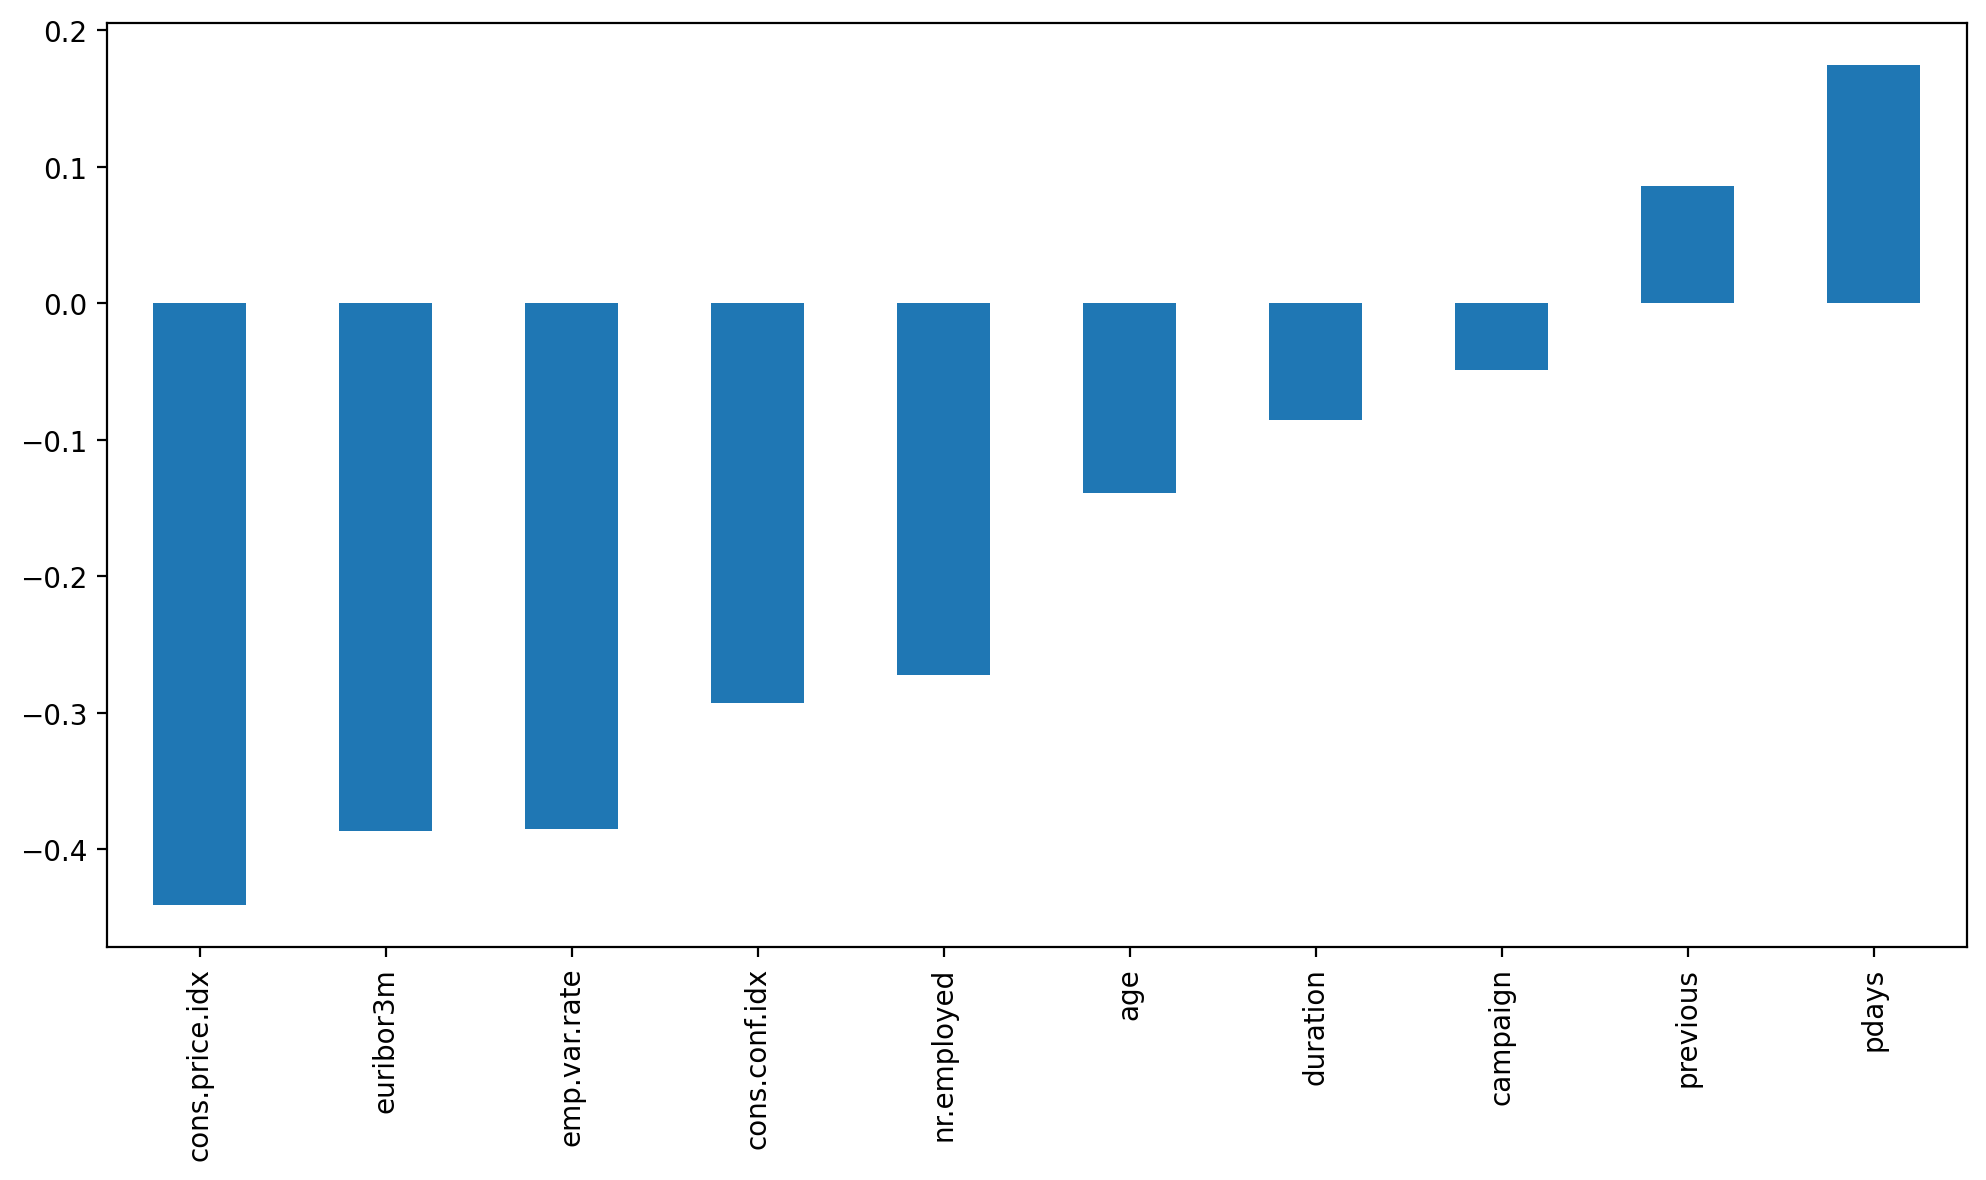

In [23]:
plt.figure(figsize=(12,6),dpi=200)
df.corr()['Clusterk6'].iloc[:-1].sort_values().plot(kind='bar')

### Pairplot of Clusters

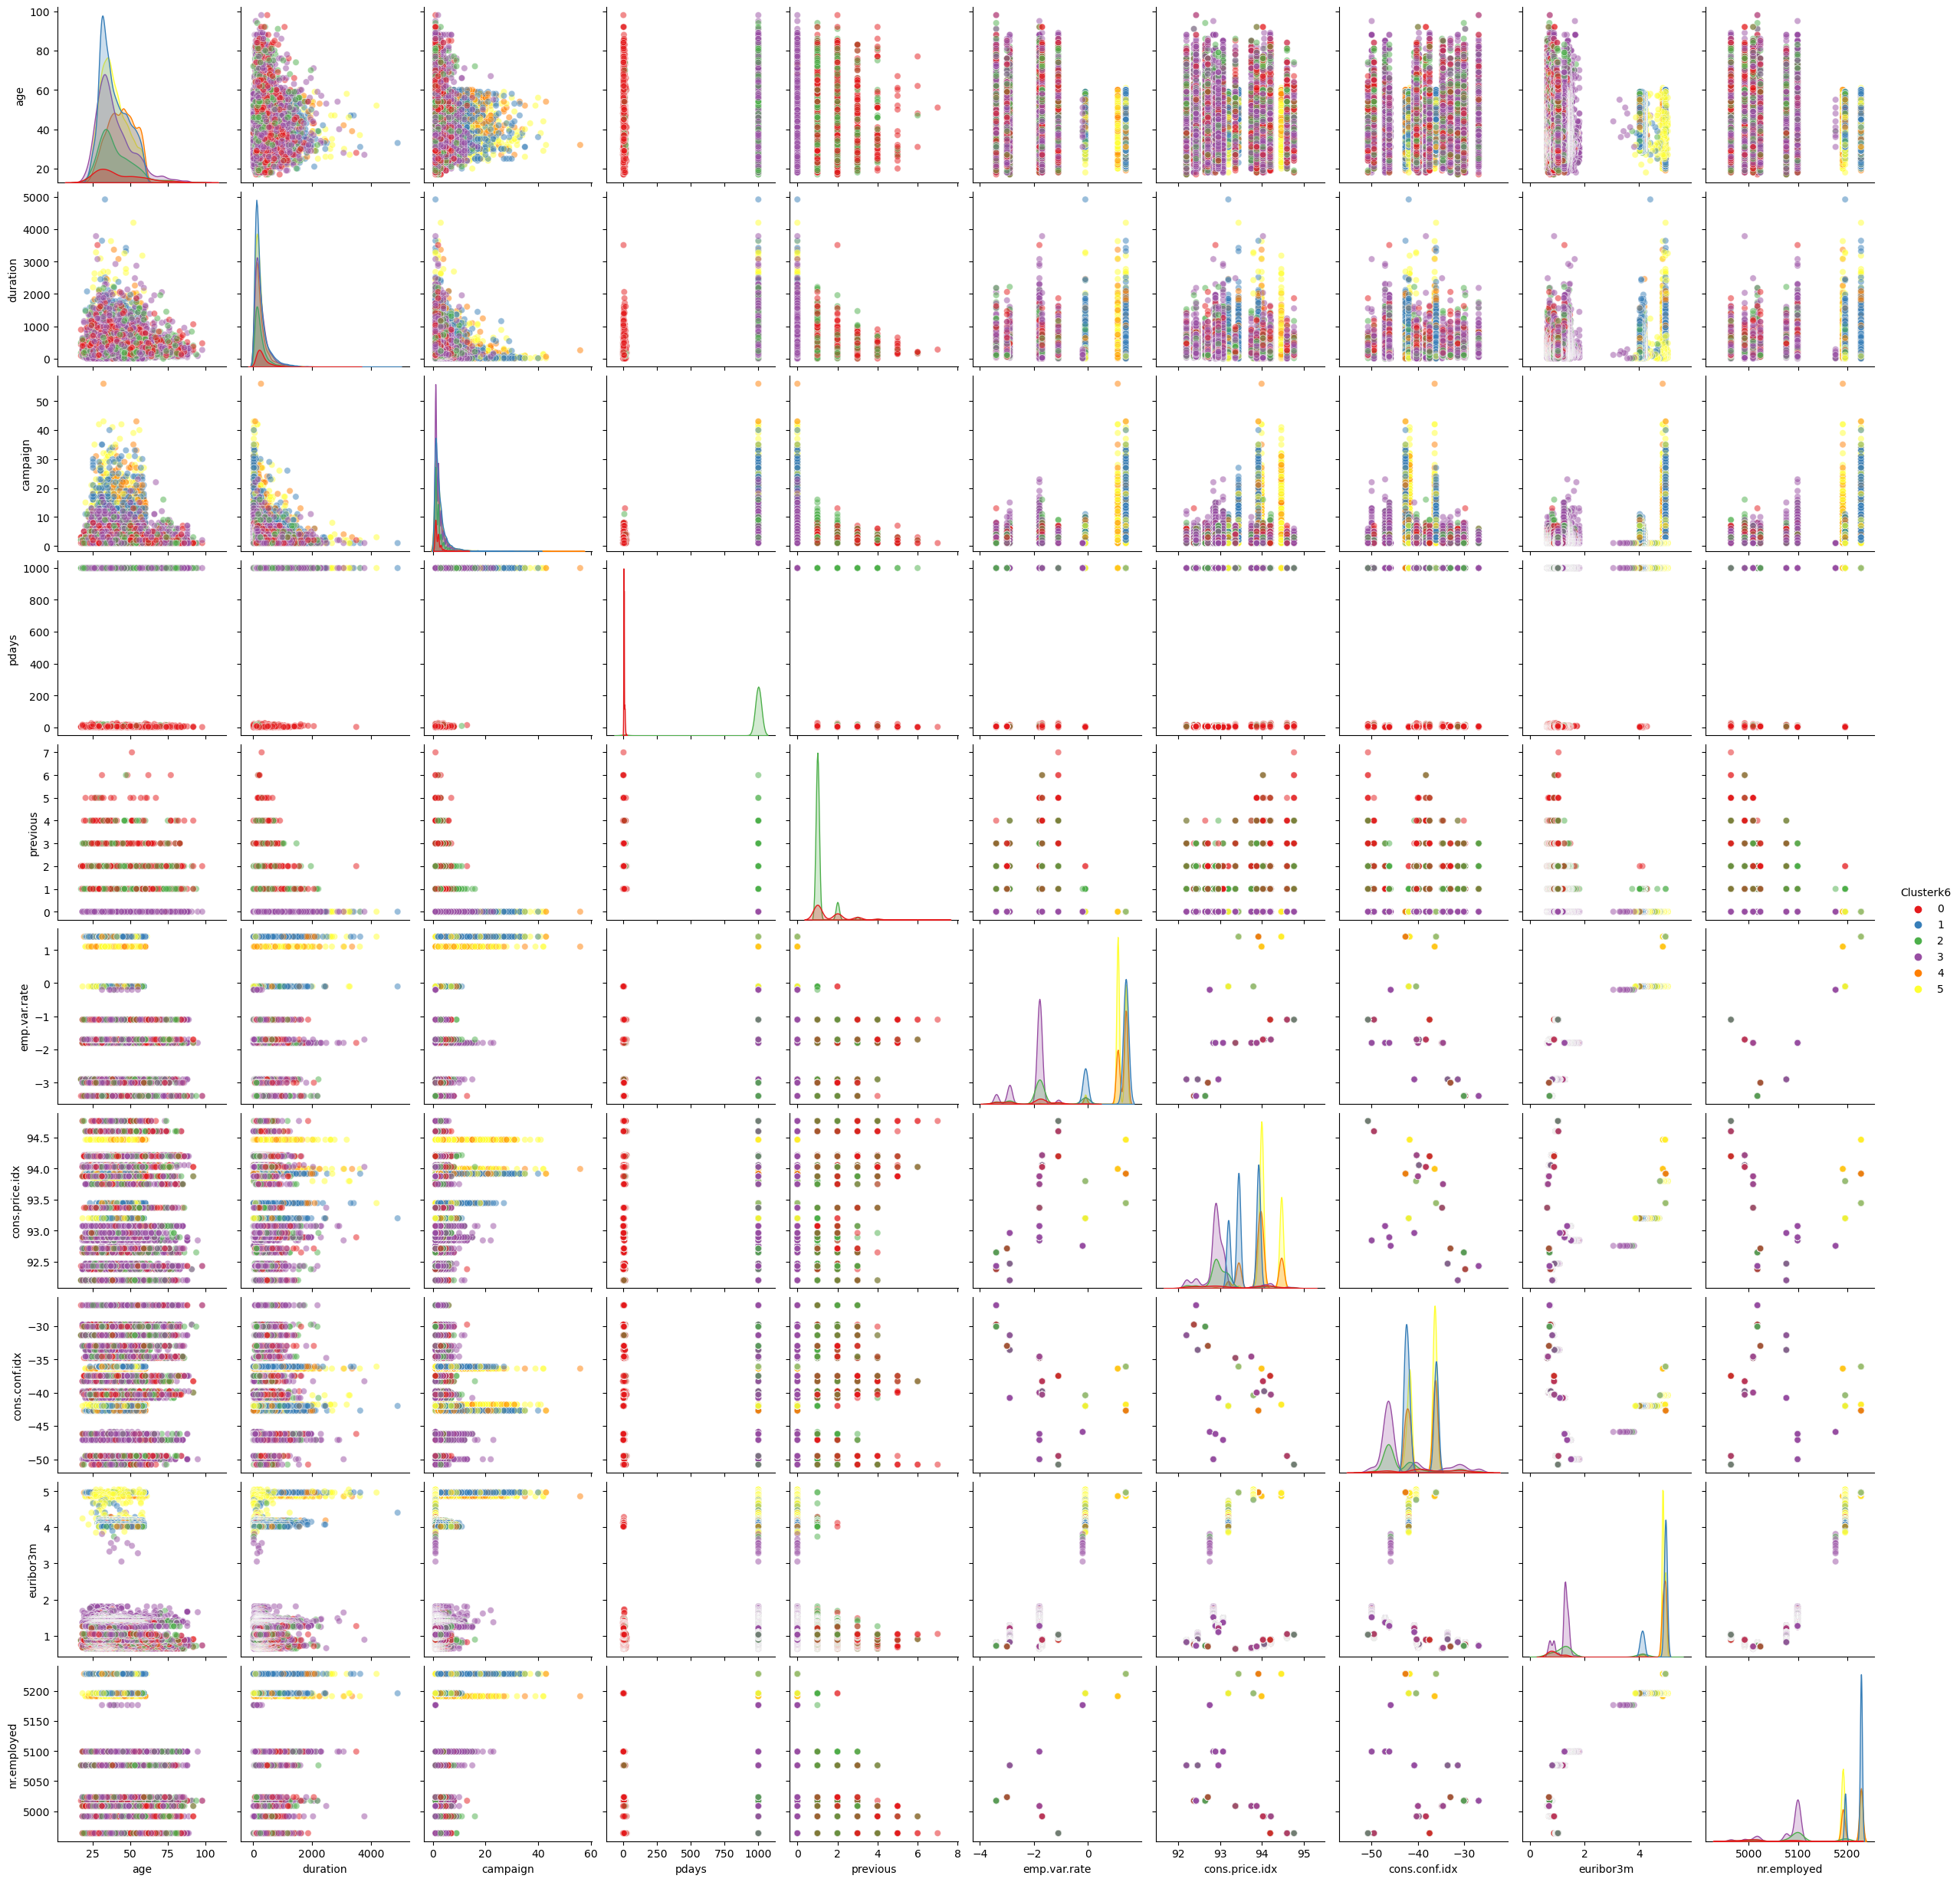

In [64]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Create a pairplot to visualize the clustering
sns.pairplot(df, hue="Clusterk6", palette="Set1", plot_kws={'alpha':0.5})
plt.show();

### Exploring the data by cluster 

In [51]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   month  day_of_week  duration  campaign  pdays  previous     poutcome  \
0      6            1       261         1    999         0  nonexistent   
1      6            1       149         1    999         0  nonexistent   
2      6            1       226         1    999         0  nonexistent   
3      6            1       151         1    999         0  nonexistent   
4      6            1       307         1    999         0  nonexistent   

   cons.price.idx  cons.conf.idx  euribor3m  subscribed  Clusterk6  
0          93.994          -36.4      4.857           0          0  
1          93.994          -36.4      4.857           0          2  
2          93.994          -36.4      4.857           0          1  
3          93.994          -36.4      4.857           0          1  
4          93.994          -36.4      4.857           0          1

### Plotting frequency plots for the variable 'job', by cluster: 

<Figure size 2400x1200 with 0 Axes>

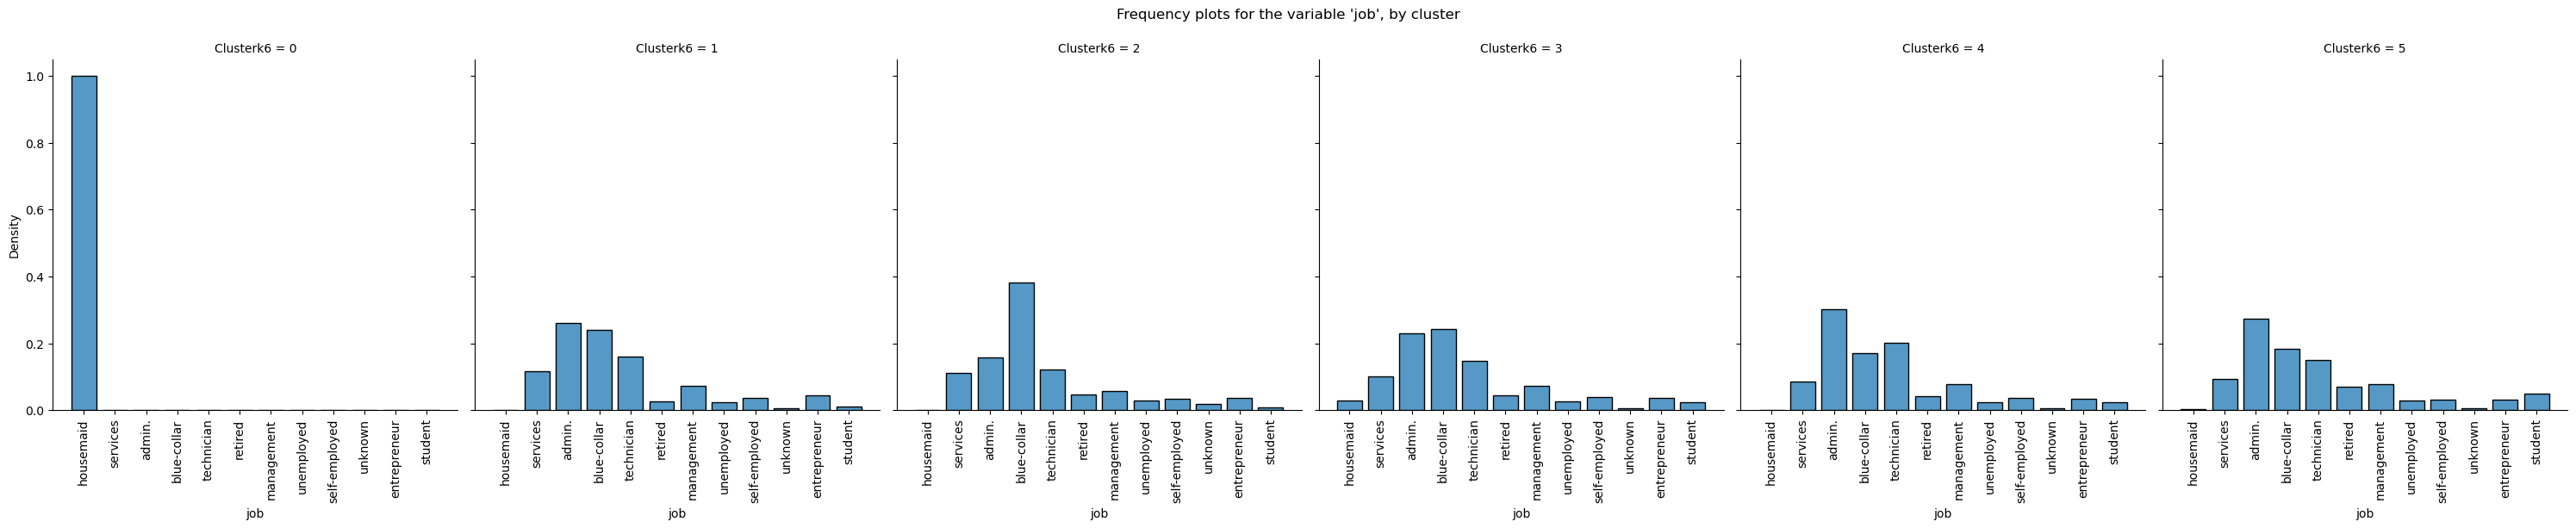

In [56]:
plt.figure(figsize=(12,6),dpi=200)
g = sns.displot(data=df, x='job', col='Clusterk6', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.set_xticklabels(rotation=90)
g.fig.suptitle("Frequency plots for the variable 'job', by cluster", y=1.05)
plt.show()

#### Conclusion: 
We see that in clusters 0, most of the clients are housemaid.

In cluster 1, most of the clients are in administrative jobs and blue-collar jobs, technicians running second. 

In cluster 2, most of the clients are blue-collar, clients in administrative jobs running second.

In cluster 3,most of them are blue-collar followed by clients in administrative jobs. 

In cluster 4,most clients, most of the clients are in administrative jobs followed by technicians. 

In cluster 5,most clients, most of the clients are in administrative jobs followed by blue-collars.

### Plotting frequency plots for the variable 'marital', by cluster: 

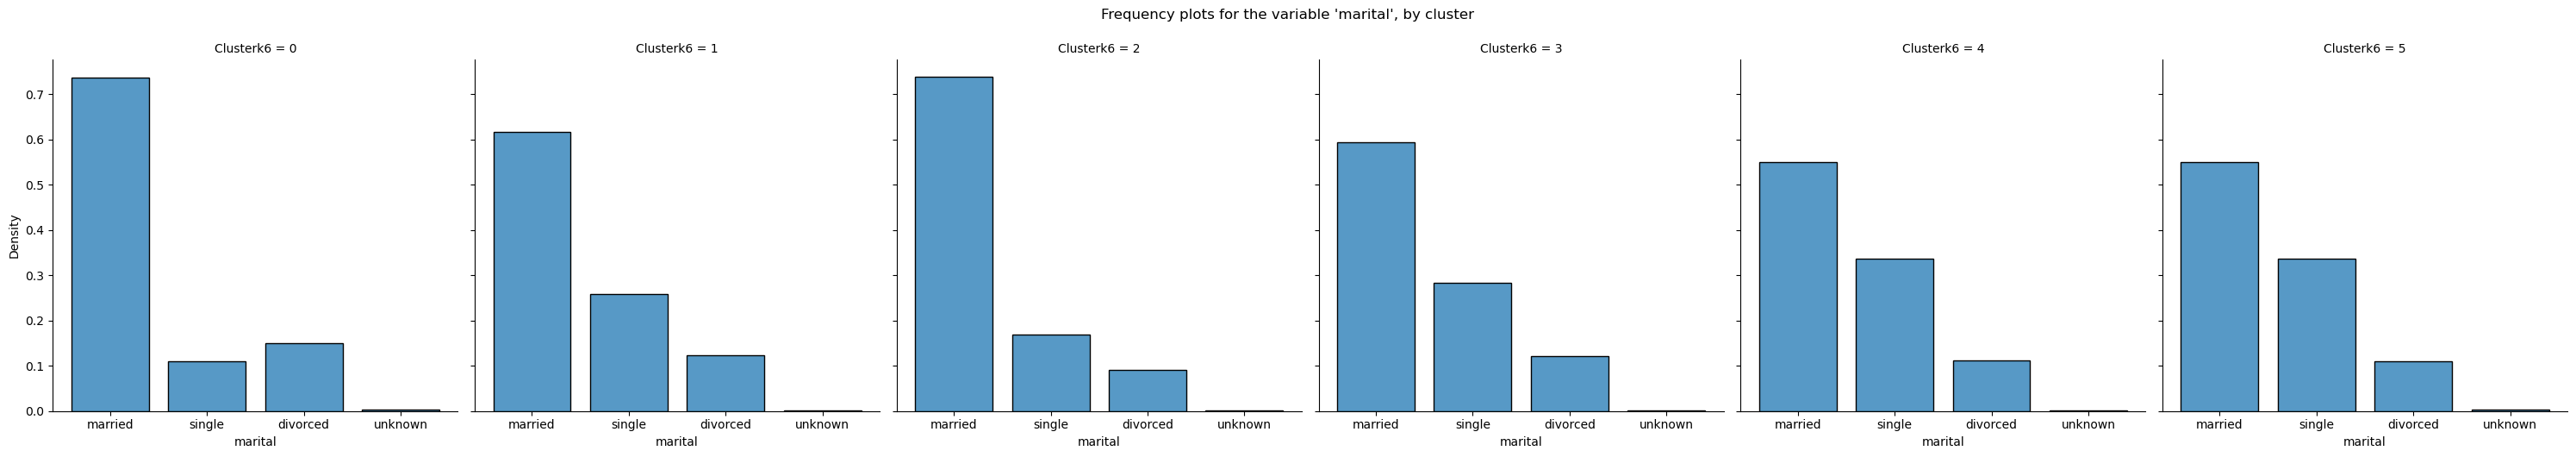

In [58]:
g = sns.displot(data=df, x='marital', col='Clusterk6', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.fig.suptitle("Frequency plots for the variable 'marital', by cluster", y=1.05)
plt.show()

#### In all the clusters, most of the clients are married, followed by single then divorced, however in cluster 0, divorced clients are slightly more than single clients. 

### Plotting frequency plots for the variable 'education', by cluster: 

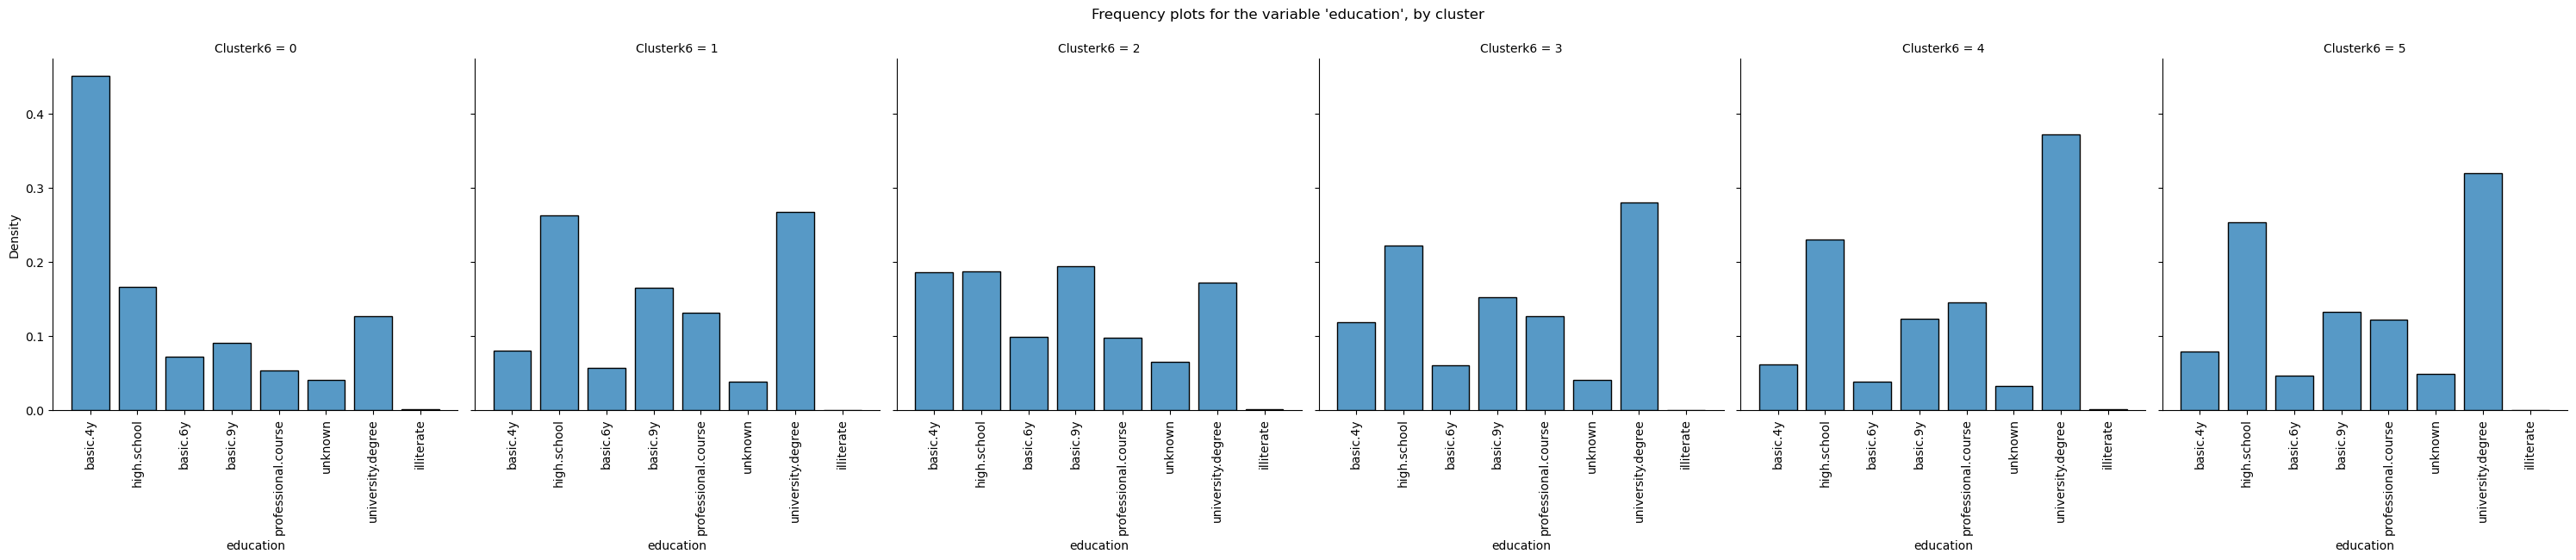

In [28]:
g = sns.displot(data=df, x='education', col='Clusterk6', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.set_xticklabels(rotation=90)
g.fig.suptitle("Frequency plots for the variable 'education', by cluster", y=1.05)
plt.show()


In cluster 0, basic 4y. is the main level level of education among the clients followed by high-school
In cluster 1, clients mainly belong to university and high-school followed by basic 4.y
In cluster 2, clients mainly belong to basic 4-year, basi9c 9-year, high-school followed by university-degree.
In cluster 3, university degree is the main level of education followed by high-school.
In cluster 4, university degree is the main level of education followed by high-school, but more number of university degree clients than cluster 3.
In cluster 5,university degree is the main level of education followed by high-school, but more number of university degree clients than cluster 3 but less than cluster 4.

### Plotting frequency plots for the variable 'default', by cluster: 

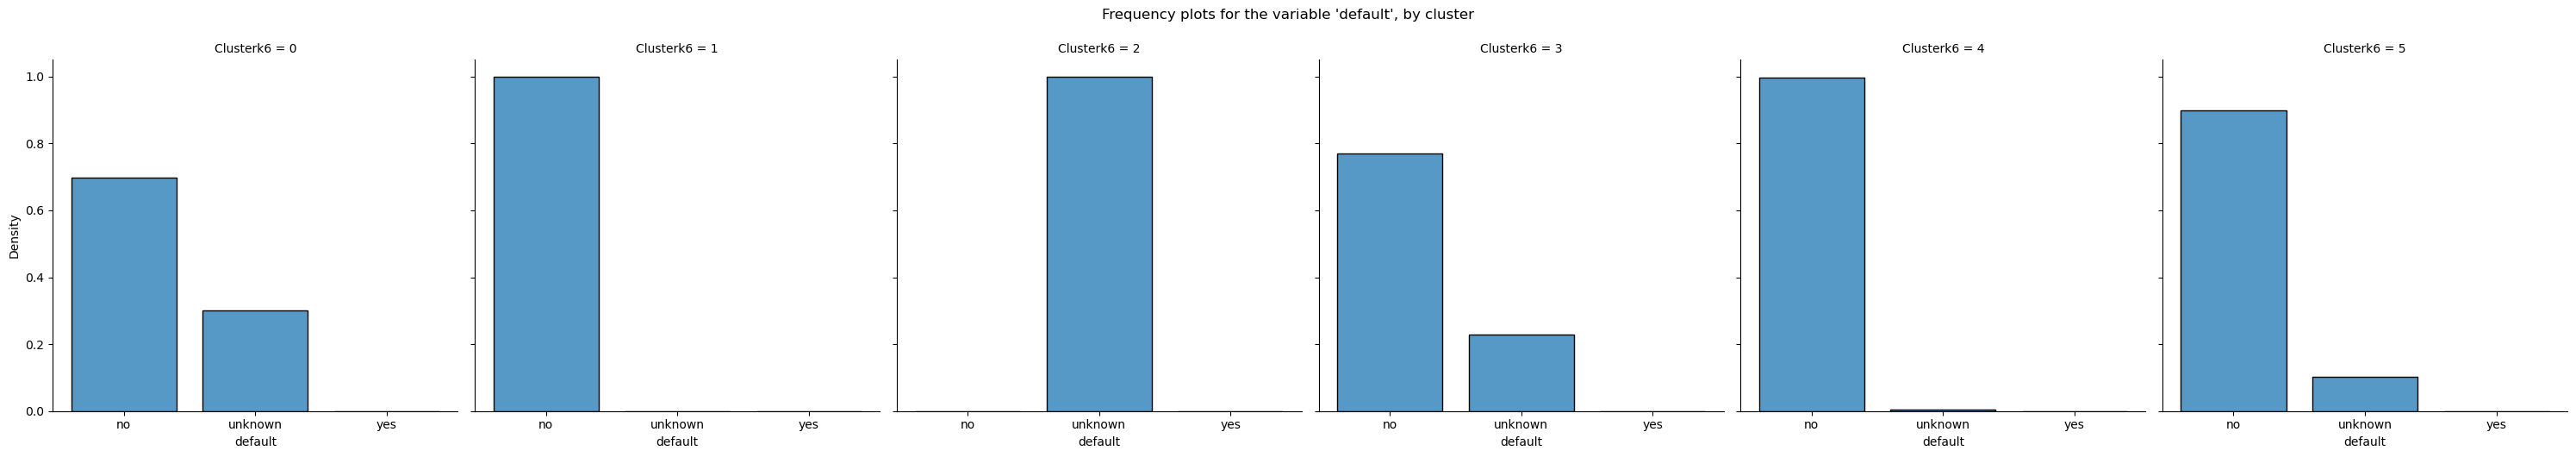

In [68]:
g = sns.displot(data=df, x='default', col='Clusterk6', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.fig.suptitle("Frequency plots for the variable 'default', by cluster", y=1.05)
plt.show()

#### In clusters 0,1,3,4,5, clients do not have credit in default. In cluster 2, there is no knowledge whether the clients have or do not have credit in default. 

### Plotting frequency plots for the variable 'housing', by cluster: 

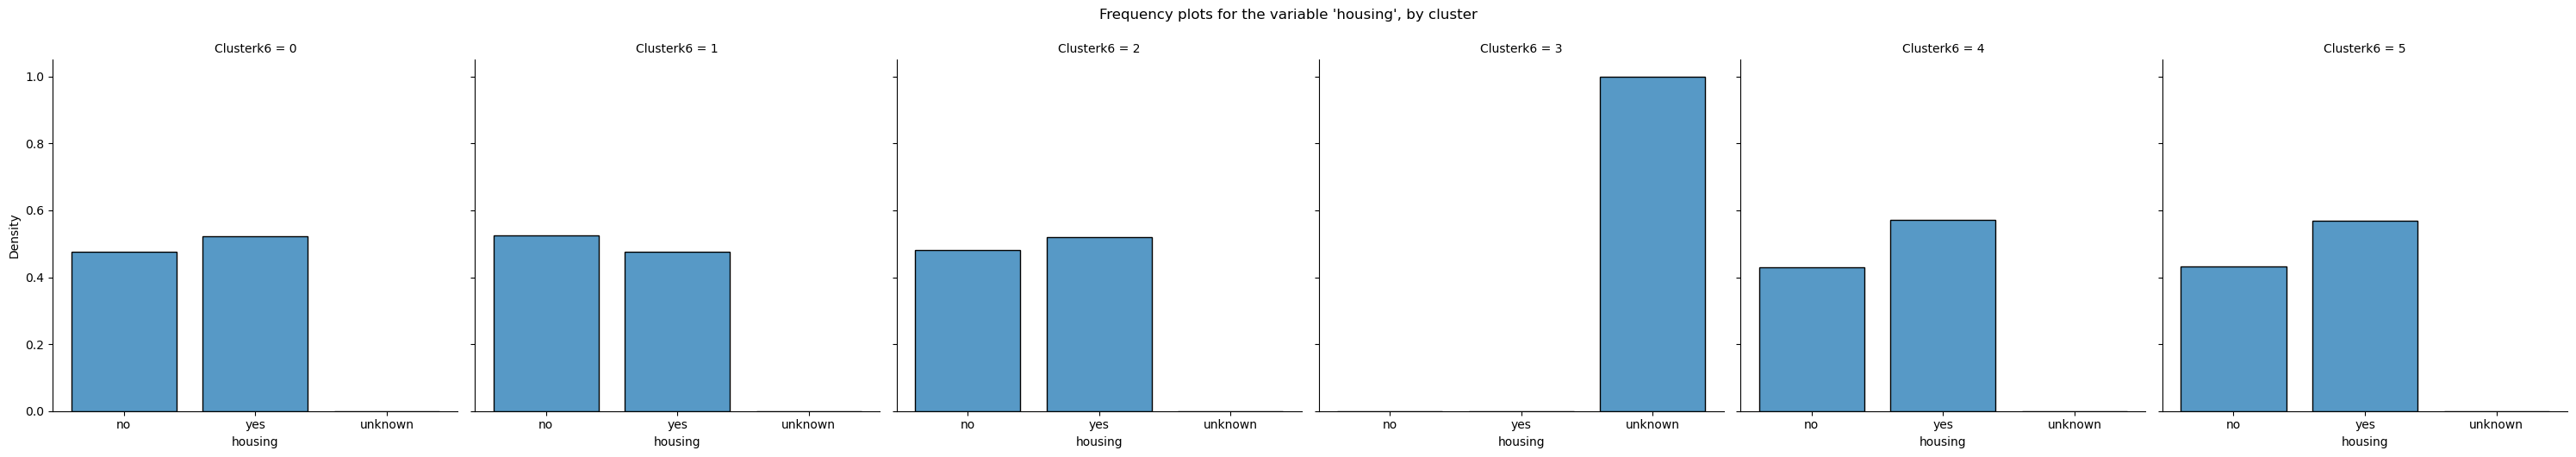

In [69]:
g = sns.displot(data=df, x='housing', col='Clusterk6', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.fig.suptitle("Frequency plots for the variable 'housing', by cluster", y=1.05)
plt.show()

#### In the clusters 0,1,2, the proportion of individuals having or not having housing loan is not significantly different. However in cluster 0,2,4,6, proportion of clients having house loan is greater than proportion of individuals not having house loan. In cluster 3, there is no information that whether the clients have or do not have housing loan.

### Plotting frequency plots for the variable 'loan', by cluster: 

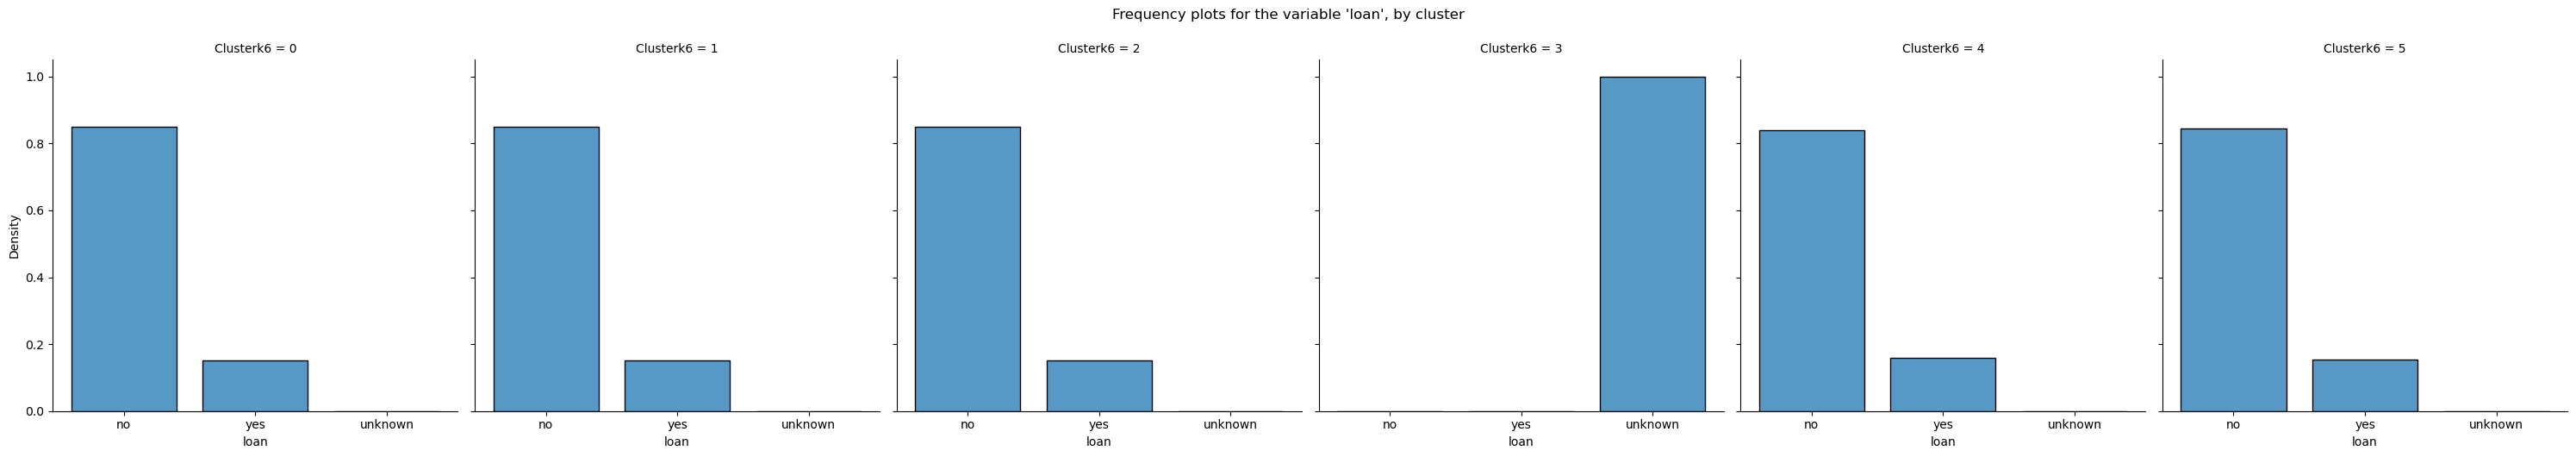

In [70]:
g = sns.displot(data=df, x='loan', col='Clusterk6', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.fig.suptitle("Frequency plots for the variable 'loan', by cluster", y=1.05)
plt.show()

#### In all the clusters, mainly clients have no personal loans except in cluster 3 where those clients are included in whose case the bank do not have knowledge whether they have or do not have personal loans. 

### Plotting histograms for the variable 'age', by cluster: 

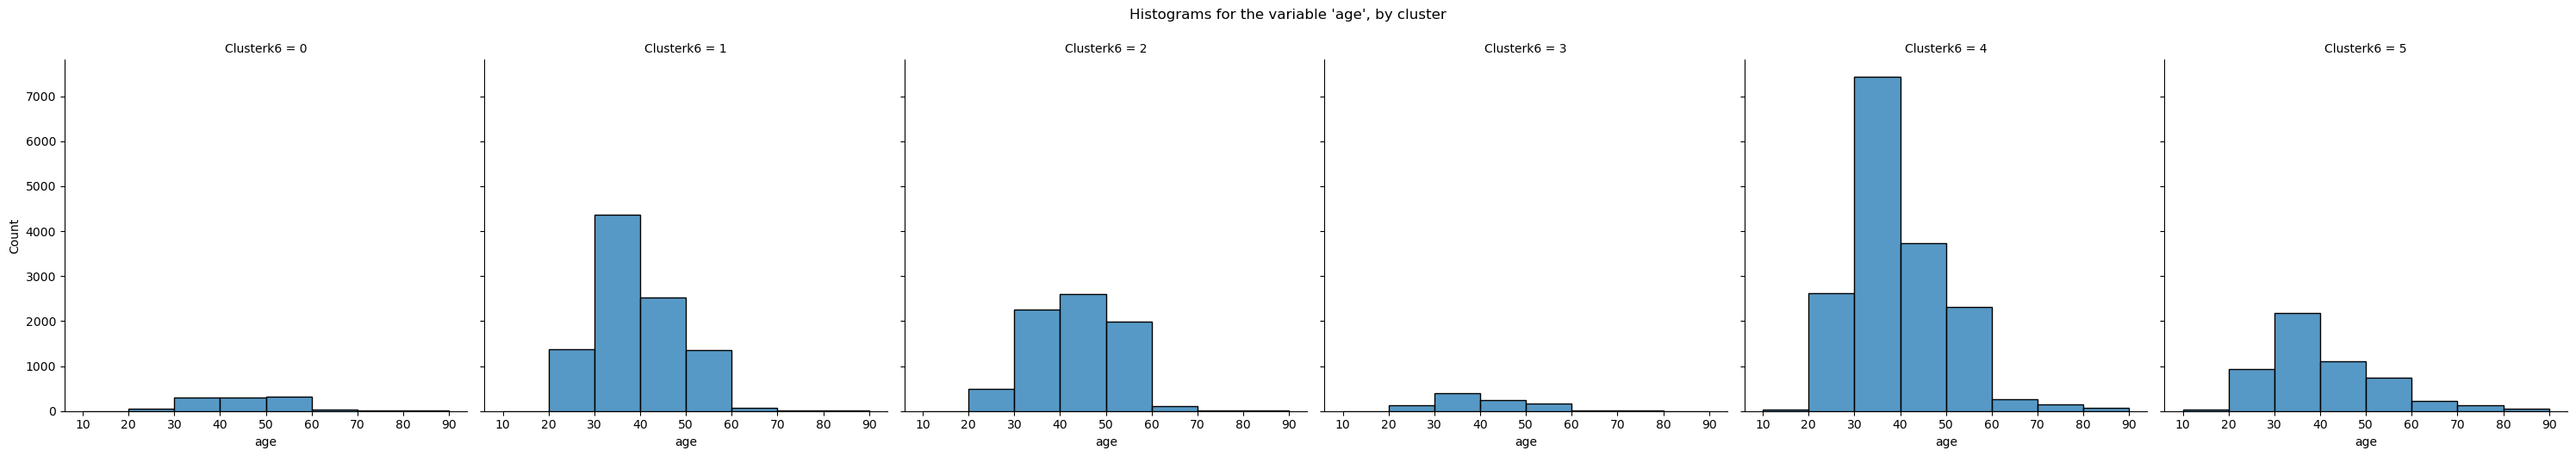

In [71]:
g = sns.displot(data=df, x='age', col='Clusterk6', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
g.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)
plt.show()

#### In all the clusters, clients are mainly in the age group 30-40 except in cluster 2 where slightly more number of clusters are in the age group 40-50 

### Conclusion:-
0) In cluster 0, most of the clients are house-maid, married, having basic 4 years of education, mostly having no credit in default with a few unknown cases of credit in default, may or may not have a housing loan, mostly do not have personal loans, aged between 30-60.

1) In cluster 1, mostly clients are in adminstrative jobs and blue-collar jobs(clients in administrative jobs being slightly high) and technicians and services being second, mostly married,education is university degree(administrative jobs) and high-school(blue-collar jobs), having no credit in default, may or may not having housing loan, mainly not having personal loan, aged between 30-40 years of age.

2) In cluster 2, mostly clients are from blue collar jobs, mainly having basic 4-years, basic 9-years of education or high-school education, but have no knowledge that whether they have or do not have credit in default, may or may not have housing loan, mostly do not have personal loan, aged mainly between 30-50.

3) In cluster 3, mostly clients are in adminstrative jobs and blue-collar jobs(clients in blue-collar jobs being slightly high),
mostly married but many single as well,clients mainly have university degree and high-school education, mainly having no credit in default with a few unknown cases of credit in default,it is not known whether thay have or do not have housing or personal loans,aged mainly between 30-40.

4) In cluster 4, mostly clients are in adminstrative jobs,married but significant single clients are also present, mainly having university degree of education, having no credit in default, having housing loan but almost no personal loan, aged mainly 30-40.

5) in cluster 5, clients are in administrative jobs(slightly high) than technicians and blue-collar jobs being second, married but significant single clients are also present, having mainly university degree with significant clients having high-school education, having no credit in default, may or may not have housing loan, not having personal loan, aged mainly between 30-40. 

### Inference:
To make the marketing campaign more effective as well as reduce cost of marketing campaign, bank must focus on targetting the clients in the clusters having high financial literacy to moderate financial literacy.

Cluster 4 have highest financial literacy.

cluster 1,3,5 have moderate financial literacy.

Cluster 0,2 have low financial literacy.

Banks should focus on clients with higher financial literacy because:-

i) They  are more likely to understand and engage with a wider range of financial products and respond more to offerings like personal loans, retirement accounts investments, credit cards and saving accounts which increases their life-time value(LTV) to the bank. So banks need not invest much on educational marketing.

ii) They are more responsible with managing debts and credits which is important for banks as the risks of non-payment and credit-in default affects profitability of the bank.

iii) Once such clients are on-board with the financial products, banks can cross-sell additional products like credit-cards, auto-loans, wealth management services without much effort.

iv) They are more likely to be technically proficient (especially in Cluster 4), digital marketing allows for highly targeted, cost-effective campaigns.

But at the same time, banks should not neglect clients with lower financial literacy. Instead, banks can focus on offering simpler products and financial education initiatives to these clients. This could lead to long-term growth, as these clients may evolve into higher-value customers over time.

